In [128]:
import sys
import os
sys.path.append('src')
sys.path.append('models')
sys.path.append('data')
#from librerias import *
from utils import *
%load_ext autoreload
%autoreload 2

#install_requirements()
generate_requirements_txt("requirements.txt")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Generated requirements.txt successfully in the data directory!


In [48]:
df_target_validacion_solo_id = pd.read_csv("./data/df_validacion/df_target_validacion_solo_id.csv")
df_cobros_validacion = pd.read_csv("./data/df_validacion/df_cobros_validacion.csv")
df_Cliente_validacion = pd.merge(df_target_validacion_solo_id, df_cobros_validacion, on='id')


df_consumos_validacion = pd.read_csv("./data/df_validacion/consumos_validacion.csv")

df_loans_validacion = pd.read_csv("./data/df_validacion/df_loans_validacion.csv")
df_quejas_validacion = pd.read_csv("./data/df_validacion/df_quejas_validacion.csv")

print(df_Cliente_validacion.info())
print(df_Cliente_validacion.describe())
""" #Print information and descriptive statistics for each dataset

print(f"\n consumos_validacion: \n ")
print(df_consumos_validacion.info())
print(df_consumos_validacion.describe())

print(f"\n df_target_validacion_solo_id: \n ")
print(df_target_validacion_solo_id.info())
print(df_target_validacion_solo_id.describe())  # Might not have numerical columns for describe

print(f"\n df_cobros_validacion: \n ")
print(df_cobros_validacion.info())
print(df_cobros_validacion.describe())

print(f"\n df_loans_validacion: \n ")
print(df_loans_validacion.info())
print(df_loans_validacion.describe())

print(f"\n df_quejas_validacion: \n ")
print(df_quejas_validacion.info())
print(df_quejas_validacion.describe())  # Might not have numerical columns for describe"""


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       1500 non-null   object 
 1   dias_atraso              1500 non-null   float64
 2   limite_credito           1500 non-null   float64
 3   fecha_activacion         1500 non-null   object 
 4   probabilidad_default_TC  967 non-null    float64
 5   tiene_cuenta             1499 non-null   object 
 6   sector                   1383 non-null   object 
 7   ciudad                   1445 non-null   object 
 8   TC_garantizada           1139 non-null   object 
 9   id_ocupacion             478 non-null    float64
 10  id_tipo_ocupacion        478 non-null    float64
 11  nombre_ocupacion         478 non-null    object 
 12  fecha_nacimiento         1497 non-null   object 
dtypes: float64(5), object(8)
memory usage: 164.1+ KB
None
       dias_atraso  limi

In [51]:
import pandas as pd

# Cargar los datos
df_target_participantes = pd.read_csv("./data/df_entrenamiento/df_target_participantes.csv")
df_cobros_participantes = pd.read_csv("./data/df_entrenamiento/df_cobros_participantes.csv")
df_Clientes = pd.merge(df_target_participantes, df_cobros_participantes, on='id')

df_consumos_participantes = pd.read_csv("./data/df_entrenamiento/consumos_participantes.csv")
df_loans_participantes = pd.read_csv("./data/df_entrenamiento/df_loans_participantes.csv")
df_quejas_participantes = pd.read_csv("./data/df_entrenamiento/df_quejas_participantes.csv")

# Función para explorar columnas categóricas
def explorar_columnas_categoricas(df, nombre_df):
    print(f'\nExploración de columnas categóricas en {nombre_df}:\n')
    cat_columns = df.select_dtypes(include=['object']).columns
    print(cat_columns.drop(['id','fecha_activacion']))
    for col in cat_columns.drop('id'):
        
        print(f"Columna: {col}")
        print(f" - Tipo de dato: {df[col].dtype}")
        print(f" - Número de valores únicos: {df[col].nunique()}")
        print(f" - Valores únicos: {df[col].unique()[:10]}...")  # Muestra los primeros 10 valores únicos
        print(f" - Valores más frecuentes:\n{df[col].value_counts().head(5)}")
        print(f" - Porcentaje de valores nulos: {df[col].isnull().mean() * 100:.2f}%")
        print('-' * 80)

# Ejecutar exploración para cada conjunto de datos
print(df_Clientes.info())
explorar_columnas_categoricas(df_Clientes, 'df_Participantes_Target_cobros')
###explorar_columnas_categoricas(df_consumos_participantes, 'df_consumos_participantes')
####explorar_columnas_categoricas(df_loans_participantes, 'df_loans_participantes')
###explorar_columnas_categoricas(df_quejas_participantes, 'df_quejas_participantes')
df_Clientes.head(20)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33623 entries, 0 to 33622
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   churned                   33623 non-null  bool   
 1   id                        33623 non-null  object 
 2   Fecha de Cancelacion_mes  2828 non-null   object 
 3   dias_atraso               33623 non-null  float64
 4   limite_credito            33623 non-null  float64
 5   fecha_activacion          33623 non-null  object 
 6   probabilidad_default_TC   21688 non-null  float64
 7   tiene_cuenta              33582 non-null  object 
 8   sector                    31026 non-null  object 
 9   ciudad                    32543 non-null  object 
 10  TC_garantizada            25597 non-null  object 
 11  id_ocupacion              11022 non-null  float64
 12  id_tipo_ocupacion         11022 non-null  float64
 13  nombre_ocupacion          11022 non-null  object 
 14  fecha_

churned                                                 id  \
0     False  045e6848a152405f1f90c1856254bc8cb1c1c9fb5b2733...   
1     False  8146bcf48f9cde39478294ec921c0d8bb407f2ed2bc807...   
2      True  cd6d1ef108cf105d76b0dd652304bebdf5945d6dd3880d...   
3      True  6aa97b2a9c7fb3ad339caac206aadde732535d9c0d4696...   
4     False  6bf28f11cf82516057b5c2b325fb7b5597257a0000d578...   
5     False  082ef0f88fbeacb9b5a8b74eb884f7c07e660be4ea524c...   
6     False  5ace4285b742fa5d997343fdbb5388b3732a113a50eeaf...   
7     False  6d14115dc4b38efc56341f8e28de5c8ea024e79a807ff3...   
8     False  e2c10b561c4d339beed26e309a3951bf8e5390903dd9b5...   
9      True  3b9cf9d9f523c183768c1eefab4ad3c91992a1b47c19ba...   
10    False  57b3f0388aae2630d3aa3f0fc37f12d8fec57938ac9050...   
11     True  beec3bfcd07fe3d2921975e6ee9ea3834e5fd3f399008b...   
12    False  d482b0886ff9636ba5c53d4d547843c63f038da8b3cfe7...   
13    False  fd4d364b760befd593a96beaf37edc4f22760992cd98c9...   
14    False  afce684057e9d018924189f97f7f35ce9da57499e7132e...   
15    False  39fc0b64e8c02ea9685733d7946d3a57b75899babbad14...   
16    False  02c9ffa2cfb92f3b6d74ede471f91ee1f34df5fe1832d6...   
17    False  dd76af666cf646c077c2995aae66f5b4005cf45141bd2d...   
18    False  04083ec624ae87d24493d130c44bbdc2bf4a15ead4d7b7...   
19    False  96f94bcc1c451f42e7a3953af0b4680c320459445d6af5...   

   Fecha de Cancelacion_mes  dias_atraso  limite_credito fecha_activacion  \
0                       NaN          0.0        0.009980       2023-10-20   
1                       NaN          0.0        0.075982       2023-07-22   
2                   2024-03          0.0        0.015980       2023-01-26   
3                   2024-03          0.0        0.009980       2023-06-23   
4                       NaN          0.0        0.035981       2023-09-01   
5                       NaN          0.0        0.039981       2023-09-06   
6                       NaN          0.0        0.089982       2023-10-07   
7                       NaN          0.0        0.295986       2024-01-11   
8                       NaN          0.0        0.019980       2024-01-27   
9                   2024-04          0.0        0.255985       2022-12-02   
10                      NaN          0.0        0.031981       2023-09-13   
11                  2024-06          0.0        0.087982       2023-05-30   
12                      NaN          0.0        0.019980       2024-02-09   
13                      NaN          0.0        0.019980       2023-08-16   
14                      NaN          0.0        0.025981       2024-01-31   
15                      NaN          0.0        0.119982       2024-01-19   
16                      NaN          0.0        0.015980       2023-09-25   
17                      NaN          0.0        0.019980       2024-01-12   
18                      NaN          0.0        0.063981       2024-02-12   
19                      NaN          0.0        0.125983       2023-12-29   

    probabilidad_default_TC tiene_cuenta                       sector  \
0                       NaN         True                 LA ESPERILLA   
1                  0.173315         True                  MANOGUAYABO   
2                       NaN         True                   VILLA FARO   
3                       NaN         True                          NaN   
4                  0.223120         True                  LAS ESPINAS   
5                       NaN         True              VILLA VELAZQUEZ   
6                       NaN         True                      EL EDEN   
7                  0.006940         True                      CANCINO   
8                  0.108680         True                    EL MILLON   
9                  0.264672         True                          NaN   
10                      NaN         True                  EL DISTRITO   
11                 0.086380         True        ALTOS DE ARROYO HONDO   
12                 0.800345         True          

In [67]:
import pandas as pd
import datetime
from sklearn.preprocessing import LabelEncoder
leOcupaciontipo = LabelEncoder()
leOcupacionnombre = LabelEncoder()
# Cargar los datos
df_target_participantes = pd.read_csv("./data/df_entrenamiento/df_target_participantes.csv")
df_cobros_participantes = pd.read_csv("./data/df_entrenamiento/df_cobros_participantes.csv")
df_Clientes = pd.merge(df_target_participantes, df_cobros_participantes, on='id')

df_consumos_participantes = pd.read_csv("./data/df_entrenamiento/consumos_participantes.csv")
df_loans_participantes = pd.read_csv("./data/df_entrenamiento/df_loans_participantes.csv")
df_quejas_participantes = pd.read_csv("./data/df_entrenamiento/df_quejas_participantes.csv")

# Assuming df_Clientes is your DataFrame

# Get the current year
current_year = datetime.datetime.now().year

# Create new columns for year, month, and day of activation (as numbers)
df_Clientes['año_activacion'] = pd.to_datetime(df_Clientes['fecha_activacion']).dt.year
df_Clientes['mes_activacion'] = pd.to_datetime(df_Clientes['fecha_activacion']).dt.month
df_Clientes['dia_activacion'] = pd.to_datetime(df_Clientes['fecha_activacion']).dt.day

# Calculate age using the current year
df_Clientes['edad'] = current_year - pd.to_datetime(df_Clientes['fecha_nacimiento']).dt.year

df_Clientes['id_tipo_ocupacion_encoded'] = leleOcupaciontipo.fit_transform(df_Clientes['id_tipo_ocupacion'])
df_Clientes['nombre_ocupacion_encoded'] = leleOcupacionnombre.fit_transform(df_Clientes['nombre_ocupacion'])
df_transform = df_Clientes.drop(['id_tipo_ocupacion','nombre_ocupacion', ])
df_Churned = df_Clientes[df_Clientes['churned']== 1]
df_NOt_Churned = df_Clientes[df_Clientes['churned']== False]
df_Clientes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33623 entries, 0 to 33622
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   churned                    33623 non-null  bool   
 1   id                         33623 non-null  object 
 2   Fecha de Cancelacion_mes   2828 non-null   object 
 3   dias_atraso                33623 non-null  float64
 4   limite_credito             33623 non-null  float64
 5   fecha_activacion           33623 non-null  object 
 6   probabilidad_default_TC    21688 non-null  float64
 7   tiene_cuenta               33582 non-null  object 
 8   sector                     31026 non-null  object 
 9   ciudad                     32543 non-null  object 
 10  TC_garantizada             25597 non-null  object 
 11  id_ocupacion               11022 non-null  float64
 12  id_tipo_ocupacion          11022 non-null  float64
 13  nombre_ocupacion           11022 non-null  obj

In [3]:
!conda install pycaret

Solving environment: ...working... unsuccessful initial attempt using frozen solve. Retrying with flexible solve.
Solving environment: ...working... unsuccessful initial attempt using frozen solve. Retrying with flexible solve.



PackagesNotFoundError: The following packages are not available from current channels:

  - pycaret

Current channels:

  - https://conda.anaconda.org/anaconda/win-64
  - https://conda.anaconda.org/anaconda/noarch
  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [55]:

# Load the DataFrame
quejas_df = pd.read_csv('./data/df_entrenamiento/df_quejas_participantes.csv')

# Handle missing data
# quejas_df['cerrado_ticket'].fillna(quejas_df['cerrado_ticket'].mode()[0], inplace=True)
quejas_df['escalado_ticket'].fillna(False, inplace=True)
 
 
# Convert True/False to 1/0
quejas_df['cerrado_ticket'] = quejas_df['cerrado_ticket'].astype(int)
quejas_df['escalado_ticket'] = quejas_df['escalado_ticket'].astype(int)

# Normalize the text in 'canal_reclamacion_regulador' and other string columns
quejas_df['canal_reclamacion_regulador'] = quejas_df['canal_reclamacion_regulador'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
quejas_df['tipo_registro'] = quejas_df['tipo_registro'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
quejas_df['producto_aprobado'] = quejas_df['producto_aprobado'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

# One-Hot Encoding for categorical variables
quejas_df = pd.get_dummies(quejas_df, columns=['canal_reclamacion_regulador', 'tipo_registro', 'producto_aprobado'])

# Convert dates to a consistent format and create a duration feature
quejas_df['fecha_apertura_reclamacion'] = pd.to_datetime(quejas_df['fecha_apertura_reclamacion'], errors='coerce')
quejas_df['fecha_resolucion_reclamacion'] = pd.to_datetime(quejas_df['fecha_resolucion_reclamacion'], errors='coerce')

# Create a duration feature
quejas_df['duracion_resolucion'] = (quejas_df['fecha_resolucion_reclamacion'] - quejas_df['fecha_apertura_reclamacion']).dt.days

# Drop original date columns if they are no longer needed
quejas_df.drop(['fecha_apertura_reclamacion', 'fecha_resolucion_reclamacion'], axis=1, inplace=True)

# Standardize numerical features
scaler = StandardScaler()
quejas_df[['duracion_resolucion', 'numero_fila_activa', 'numero_fila_cerradas']] = scaler.fit_transform(
quejas_df[['duracion_resolucion', 'numero_fila_activa', 'numero_fila_cerradas']])
quejas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13630 entries, 0 to 13629
Data columns (total 21 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   cerrado_ticket                                               13630 non-null  int32  
 1   escalado_ticket                                              13630 non-null  int32  
 2   numero_fila_activa                                           13630 non-null  float64
 3   numero_fila_cerradas                                         13630 non-null  float64
 4   productos_activos                                            13630 non-null  object 
 5   id                                                           13630 non-null  object 
 6   canal_reclamacion_regulador_BM - PAGOS MOVILES (Apps)        13630 non-null  bool   
 7   canal_reclamacion_regulador_CA - CAJEROS AUTOMATICOS (ATM)   13630 non-null 

In [165]:
import pandas as pd
import numpy as np
import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from lazypredict.Supervised import LazyClassifier

# Cargar los datos
df_target_participantes = pd.read_csv("./data/df_entrenamiento/df_target_participantes.csv")
df_cobros_participantes = pd.read_csv("./data/df_entrenamiento/df_cobros_participantes.csv")
df_Clientes = pd.merge(df_target_participantes, df_cobros_participantes, on='id')

df_consumos_participantes = pd.read_csv("./data/df_entrenamiento/consumos_participantes.csv")
df_loans_participantes = pd.read_csv("./data/df_entrenamiento/df_loans_participantes.csv")
df_quejas_participantes = pd.read_csv("./data/df_entrenamiento/df_quejas_participantes.csv")

# Crear nuevas columnas de año, mes y día de activación y calcular edad
current_year = datetime.datetime.now().year
df_Clientes['año_activacion'] = pd.to_datetime(df_Clientes['fecha_activacion']).dt.year
df_Clientes['mes_activacion'] = pd.to_datetime(df_Clientes['fecha_activacion']).dt.month
df_Clientes['dia_activacion'] = pd.to_datetime(df_Clientes['fecha_activacion']).dt.day
df_Clientes['edad'] = current_year - pd.to_datetime(df_Clientes['fecha_nacimiento']).dt.year
df_Clientes['sector'] = df_Clientes['sector'].str.replace('ENSANCHE', '', regex=False).str.strip()


# Convertir 'tiene_cuenta' de tipo string a booleano
df_Clientes['tiene_cuenta'] = df_Clientes['tiene_cuenta'].map({True: 1, False: 0})
df_Clientes.head()
# Codificación de variables categóricas con LabelEncoder
leOcupaciontipo = LabelEncoder()
leOcupacionnombre = LabelEncoder()
leSector = LabelEncoder()
leCiudad = LabelEncoder()

df_Clientes['id_tipo_ocupacion_encoded'] = leOcupaciontipo.fit_transform(df_Clientes['id_tipo_ocupacion'].astype(str))
df_Clientes['nombre_ocupacion_encoded'] = leOcupacionnombre.fit_transform(df_Clientes['nombre_ocupacion'].astype(str))
#df_Clientes['sector_encoded'] = leSector.fit_transform(df_Clientes['sector'].astype(str))
#df_Clientes['ciudad_encoded'] = leCiudad.fit_transform(df_Clientes['ciudad'].astype(str))

# Eliminar columnas originales de ocupación y otras innecesarias
df_transform = df_Clientes.drop(columns=['id', 'fecha_activacion', 'fecha_nacimiento', 'id_tipo_ocupacion', 'nombre_ocupacion', 'sector', 'ciudad','Fecha de Cancelacion_mes','TC_garantizada','id_ocupacion'])
print(df_transform.info())
df_transform=df_transform.dropna()
print(df_transform.info())
# Separar características (X) y target (y)
X = df_transform.drop(columns=['churned'])
y = df_transform['churned']

# Dividir el conjunto de datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento de las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir porcentajes de varianza para el PCA
variance_percentages = [90, 80, 70, 60, 50]

# Realizar PCA para cada porcentaje de varianza y obtener los componentes principales
best_models = {}
for variance_percentage in variance_percentages:
    pca = PCA(n_components=variance_percentage / 100)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Imprimir la cantidad de características después del PCA
    print(f"\nPorcentaje de Varianza: {variance_percentage}%")
    print(f"Cantidad de características seleccionadas: {pca.n_components_}")

    # Usar Lazy Predict para encontrar los mejores modelos
    clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
    models_summary, _ = clf.fit(X_train_pca, X_test_pca, y_train, y_test)

    # Obtener los nombres de los 5 mejores modelos y guardarlos en un diccionario
    best_models[variance_percentage] = models_summary.head(5)

# Mostrar los mejores modelos para cada porcentaje de varianza
for variance_percentage, models_summary in best_models.items():
    print(f"\nPorcentaje de Varianza: {variance_percentage}%")
    print(models_summary)
    print("--------------------------------------")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33623 entries, 0 to 33622
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   churned                    33623 non-null  bool   
 1   dias_atraso                33623 non-null  float64
 2   limite_credito             33623 non-null  float64
 3   probabilidad_default_TC    21688 non-null  float64
 4   tiene_cuenta               33582 non-null  float64
 5   año_activacion             33623 non-null  int32  
 6   mes_activacion             33623 non-null  int32  
 7   dia_activacion             33623 non-null  int32  
 8   edad                       33546 non-null  float64
 9   id_tipo_ocupacion_encoded  33623 non-null  int32  
 10  nombre_ocupacion_encoded   33623 non-null  int32  
dtypes: bool(1), float64(5), int32(5)
memory usage: 2.0 MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 21656 entries, 1 to 33622
Data columns (total 11 colum

100%|██████████| 29/29 [00:42<00:00,  1.45s/it]


[LightGBM] [Info] Number of positive: 1435, number of negative: 15889
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000647 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 17324, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.082833 -> initscore=-2.404462
[LightGBM] [Info] Start training from score -2.404462

Porcentaje de Varianza: 80%
Cantidad de características seleccionadas: 6


100%|██████████| 29/29 [00:37<00:00,  1.28s/it]


[LightGBM] [Info] Number of positive: 1435, number of negative: 15889
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000215 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 17324, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.082833 -> initscore=-2.404462
[LightGBM] [Info] Start training from score -2.404462

Porcentaje de Varianza: 70%
Cantidad de características seleccionadas: 5


100%|██████████| 29/29 [00:36<00:00,  1.25s/it]


[LightGBM] [Info] Number of positive: 1435, number of negative: 15889
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000226 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 17324, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.082833 -> initscore=-2.404462
[LightGBM] [Info] Start training from score -2.404462

Porcentaje de Varianza: 60%
Cantidad de características seleccionadas: 4


100%|██████████| 29/29 [00:34<00:00,  1.19s/it]


[LightGBM] [Info] Number of positive: 1435, number of negative: 15889
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000203 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 17324, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.082833 -> initscore=-2.404462
[LightGBM] [Info] Start training from score -2.404462

Porcentaje de Varianza: 50%
Cantidad de características seleccionadas: 3


100%|██████████| 29/29 [00:30<00:00,  1.07s/it]


[LightGBM] [Info] Number of positive: 1435, number of negative: 15889
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000218 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 17324, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.082833 -> initscore=-2.404462
[LightGBM] [Info] Start training from score -2.404462

Porcentaje de Varianza: 90%
                        Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                    
DecisionTreeClassifier      0.92               0.75     0.75      0.92   
LGBMClassifier              0.95               0.74     0.74      0.95   
XGBClassifier               0.95               0.73     0.73      0.95   
BaggingClassifier           0.95               0.73     0.73      0.94   
RandomForestClassifier      0.95    

In [198]:
df_target_validacion_solo_id = pd.read_csv("./data/df_validacion/df_target_validacion_solo_id.csv")
df_cobros_validacion = pd.read_csv("./data/df_validacion/df_cobros_validacion.csv")
df_Cliente_validacion = pd.merge(df_target_validacion_solo_id, df_cobros_validacion, on='id')

# Crear nuevas columnas de año, mes y día de activación y calcular edad
current_year = datetime.datetime.now().year
df_Cliente_validacion['año_activacion'] = pd.to_datetime(df_Cliente_validacion['fecha_activacion']).dt.year
df_Cliente_validacion['mes_activacion'] = pd.to_datetime(df_Cliente_validacion['fecha_activacion']).dt.month
df_Cliente_validacion['dia_activacion'] = pd.to_datetime(df_Cliente_validacion['fecha_activacion']).dt.day
df_Cliente_validacion['edad'] = current_year - pd.to_datetime(df_Cliente_validacion['fecha_nacimiento']).dt.year
df_Cliente_validacion['sector'] = df_Cliente_validacion['sector'].str.replace('ENSANCHE', '', regex=False).str.strip()

# Codificar variables categóricas
df_Cliente_validacion['tiene_cuenta'] = df_Cliente_validacion['tiene_cuenta'].map({True: 1, False: 0})
df_Cliente_validacion['id_tipo_ocupacion_encoded'] = leOcupaciontipo.transform(df_Cliente_validacion['id_tipo_ocupacion'].astype(str))
df_Cliente_validacion['nombre_ocupacion_encoded'] = leOcupacionnombre.transform(df_Cliente_validacion['nombre_ocupacion'].astype(str))
#df_Cliente_validacion['sector_encoded'] = leSector.transform(df_Cliente_validacion['sector'].astype(str))
#df_Cliente_validacion['ciudad_encoded'] = leCiudad.transform(df_Cliente_validacion['ciudad'].astype(str))


# Eliminar columnas innecesarias
df_Cliente_validacion = df_Cliente_validacion.drop(columns=[ 'fecha_activacion', 'fecha_nacimiento', 'id_tipo_ocupacion', 'nombre_ocupacion', 'sector', 'ciudad','TC_garantizada','sector','id_ocupacion'])
print(df_Cliente_validacion.info())
df_Cliente_validacion= df_Cliente_validacion.dropna()
print(df_Cliente_validacion.info())
# Escalar características
X_validacion = df_Cliente_validacion
X_validacion_scaled = scaler.transform(X_validacion.drop('id'))

# Aplicar PCA
pca = PCA(n_components=0.9)  # Por ejemplo, seleccionar el 90% de varianza
X_train_pca = pca.fit_transform(X_train_scaled)
X_validacion_pca = pca.transform(X_validacion_scaled)
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report

# Seleccionar el modelo (por ejemplo, LGBMClassifier)
model = LGBMClassifier()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train_pca, y_train)

# Realizar predicciones con el conjunto de datos de validación
y_pred = model.predict(X_validacion_pca)

# Crear archivo de predicciones
predicciones = pd.DataFrame({'id': df_Cliente_validacion['id'], 'churned': y_pred})
predicciones.to_csv("prediction_Synapse.csv", index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         1500 non-null   object 
 1   dias_atraso                1500 non-null   float64
 2   limite_credito             1500 non-null   float64
 3   probabilidad_default_TC    967 non-null    float64
 4   tiene_cuenta               1499 non-null   float64
 5   año_activacion             1500 non-null   int32  
 6   mes_activacion             1500 non-null   int32  
 7   dia_activacion             1500 non-null   int32  
 8   edad                       1497 non-null   float64
 9   id_tipo_ocupacion_encoded  1500 non-null   int32  
 10  nombre_ocupacion_encoded   1500 non-null   int32  
dtypes: float64(5), int32(5), object(1)
memory usage: 99.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 965 entries, 0 to 1499
Data columns (total 11 column

KeyError: "['id'] not found in axis"


Visualizando consumos_participantes...



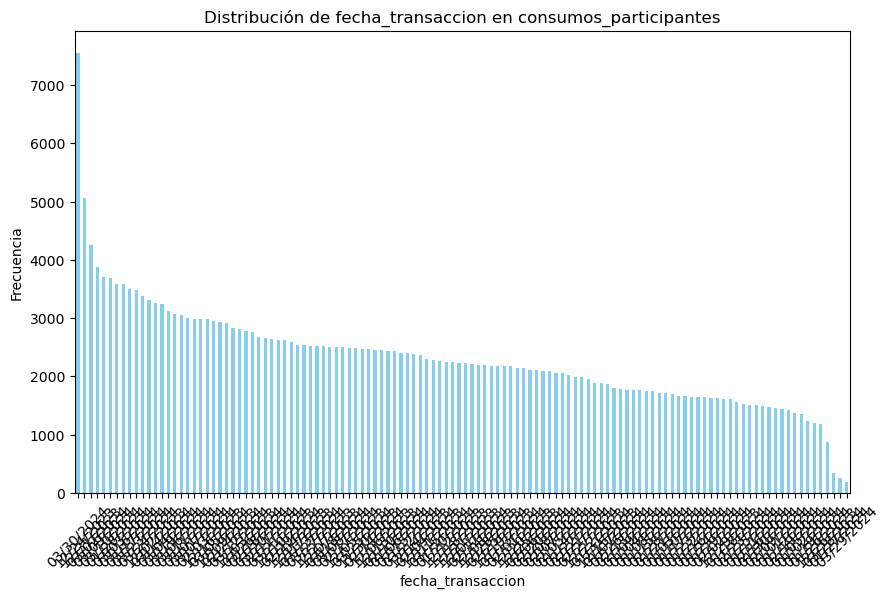

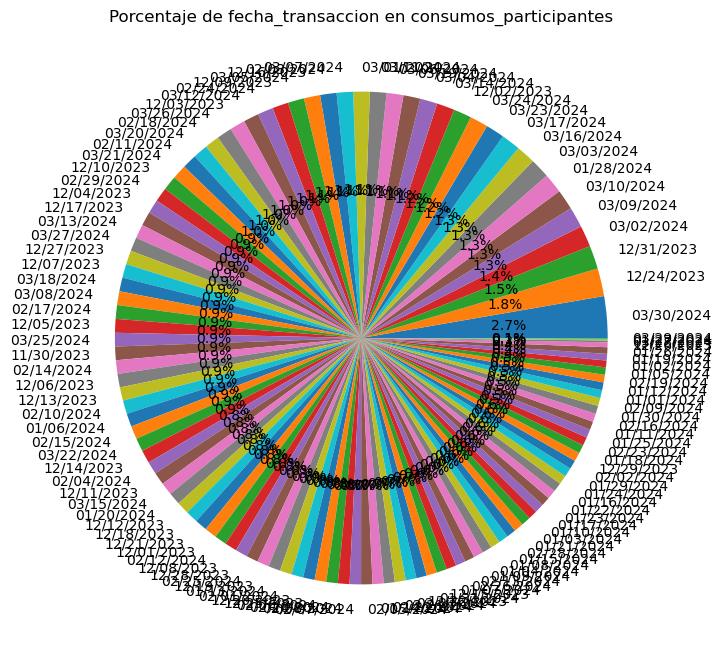

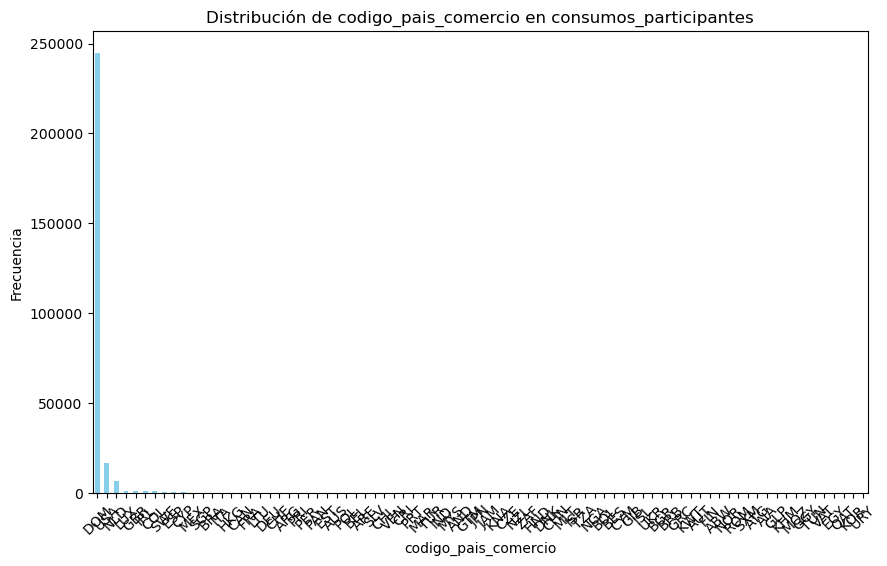

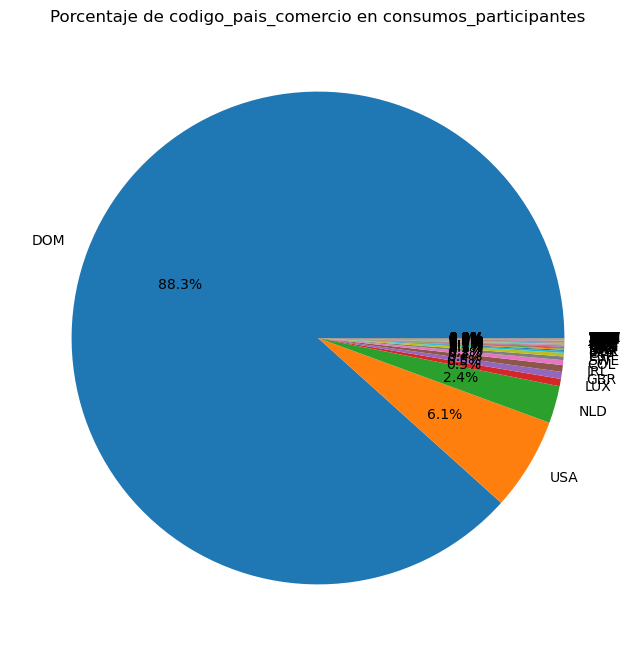

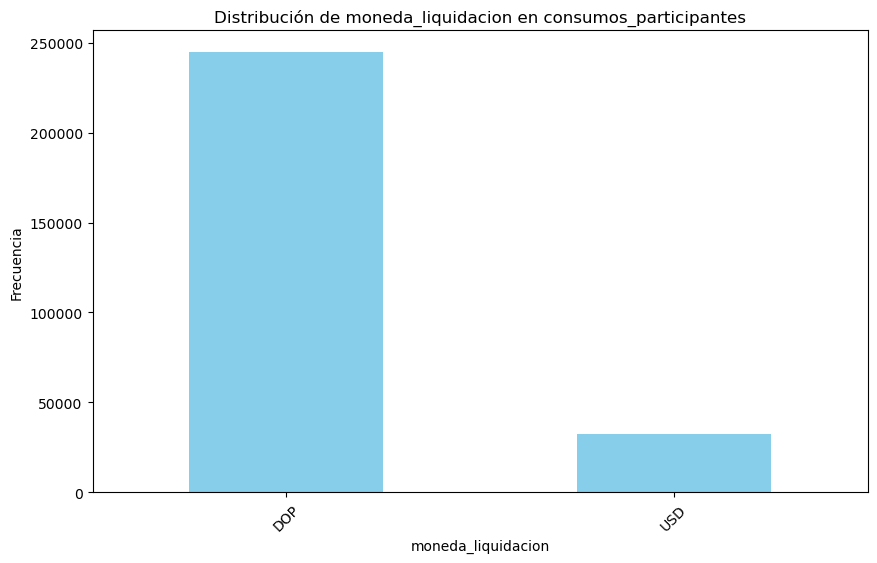

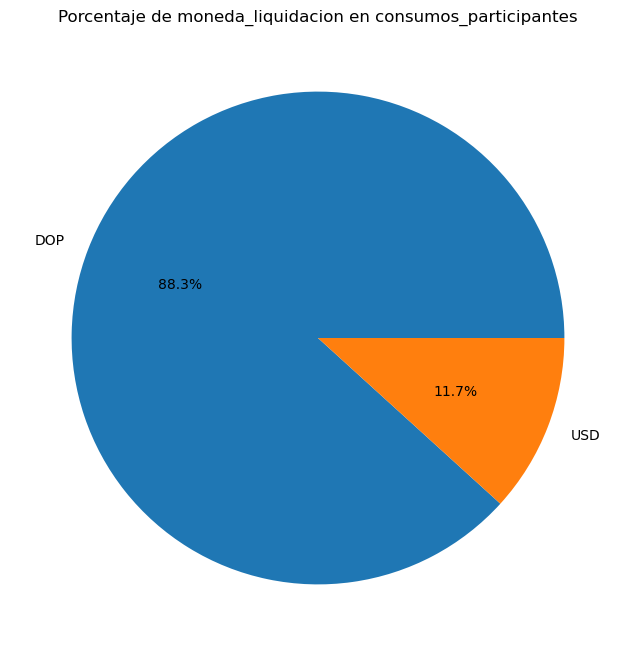

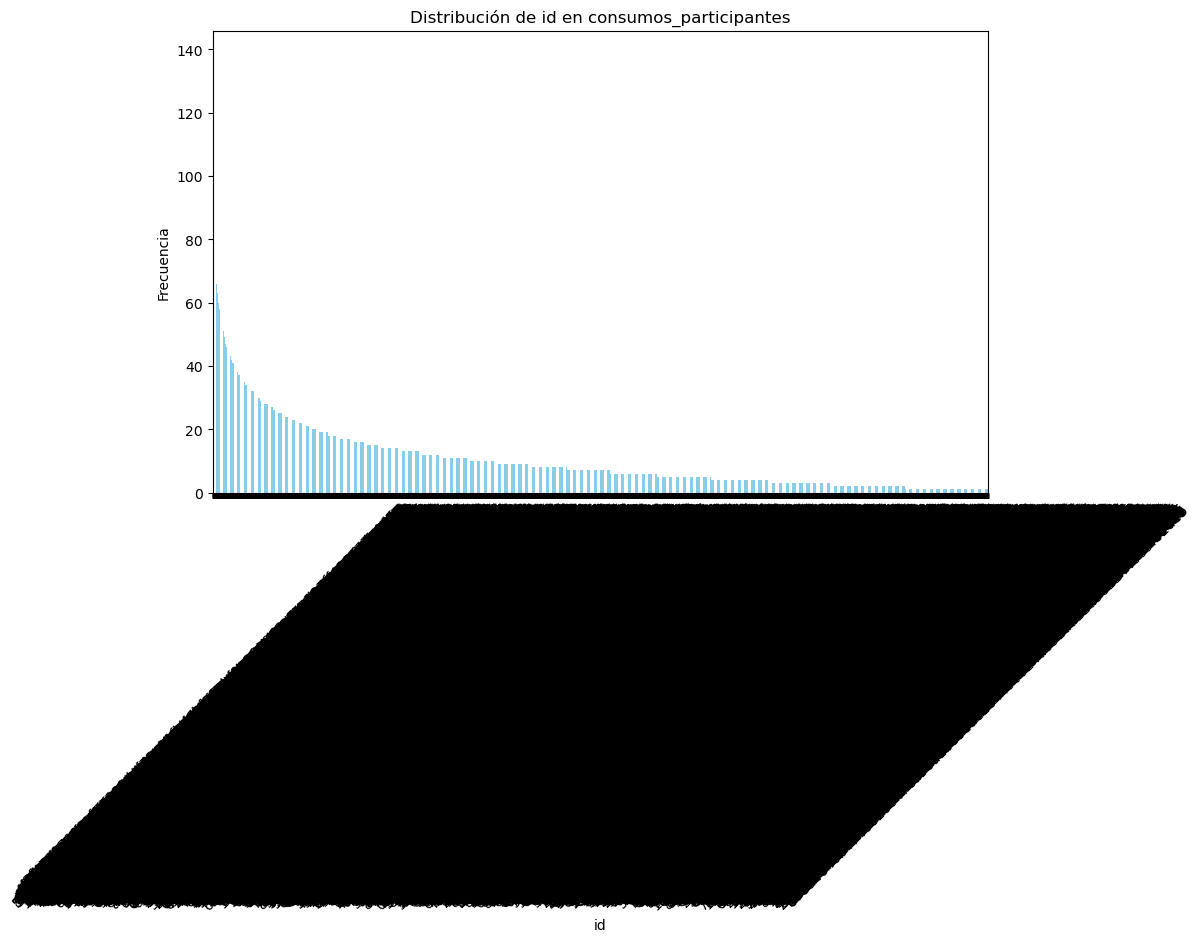

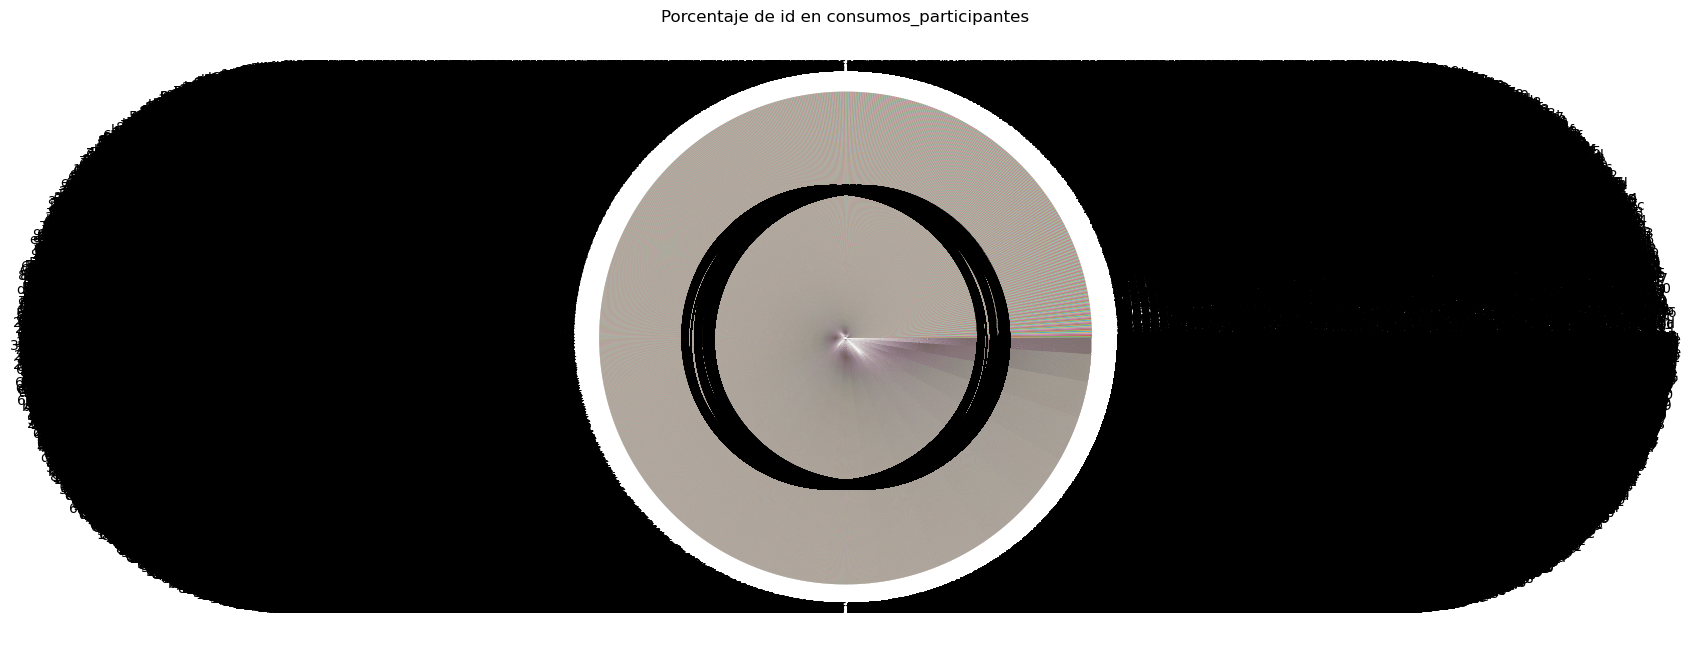

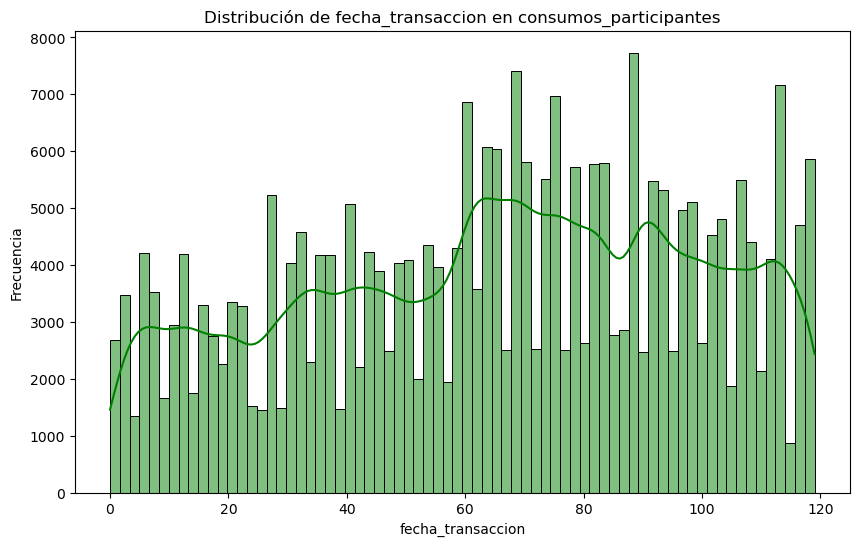

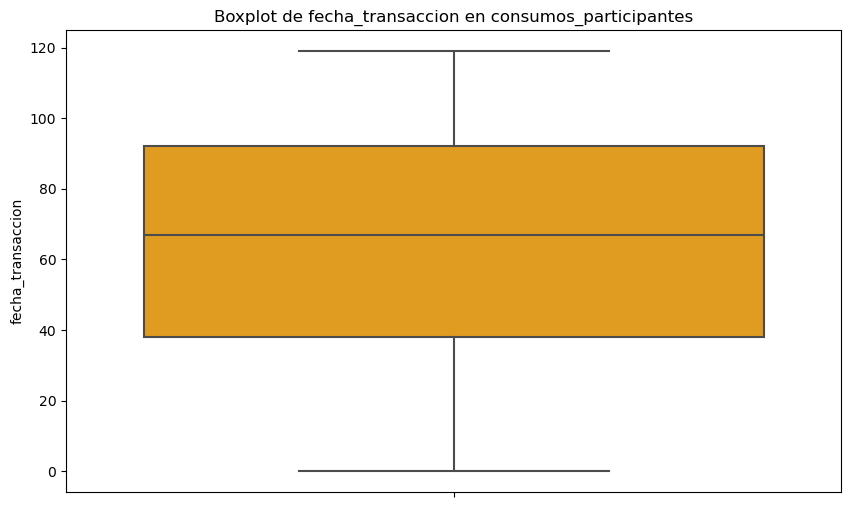

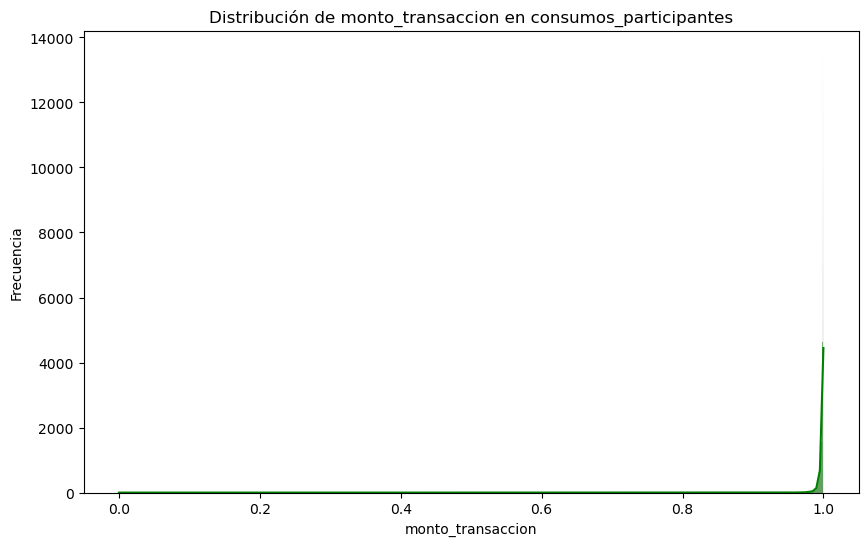

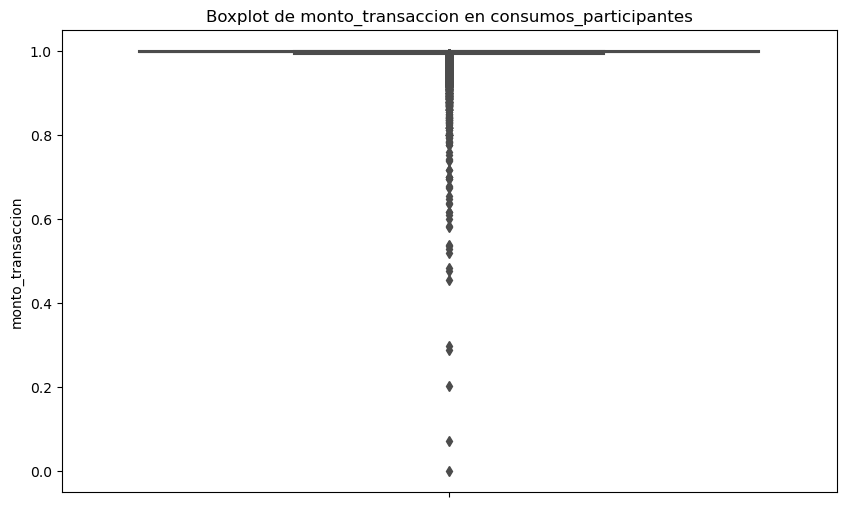

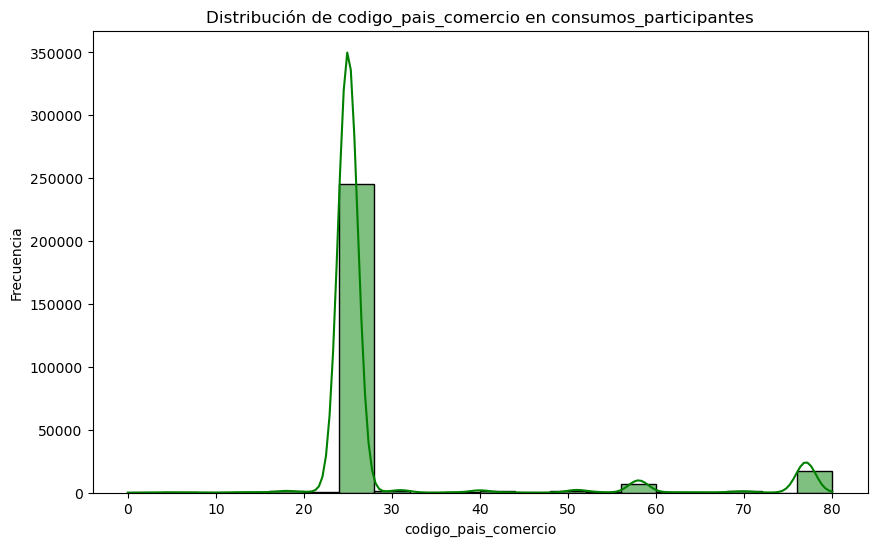

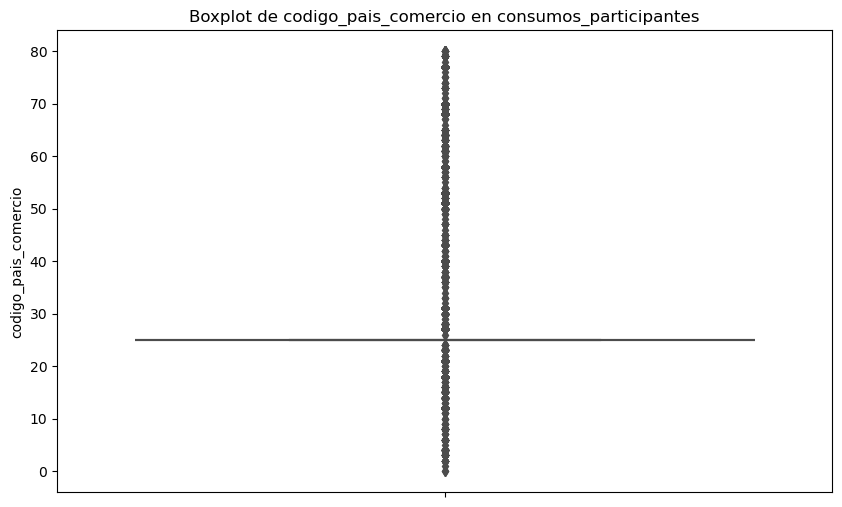

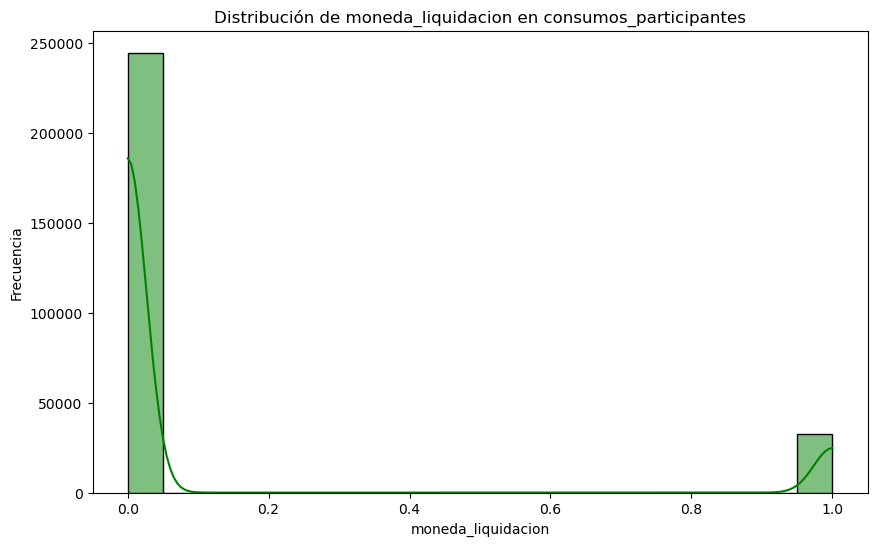

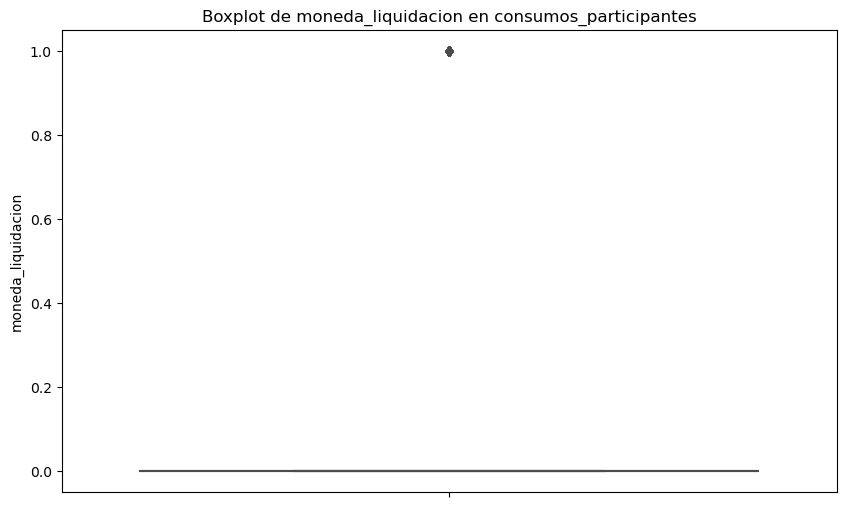

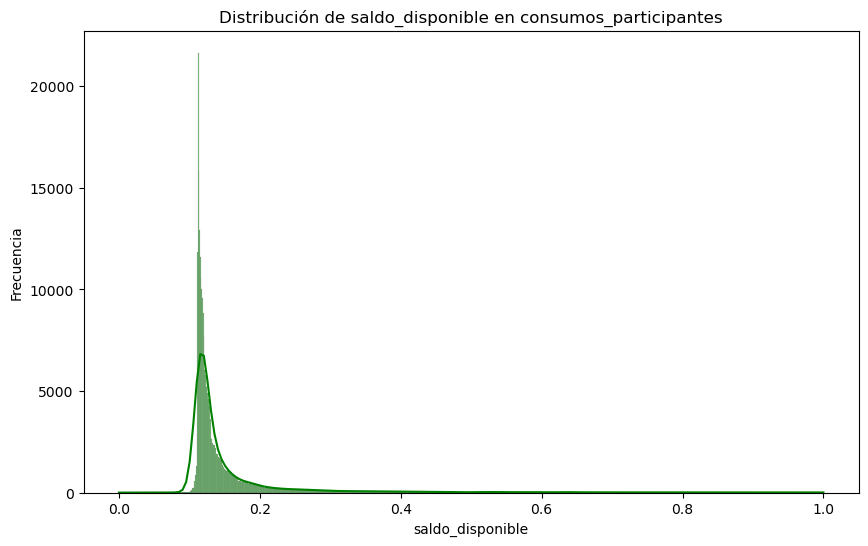

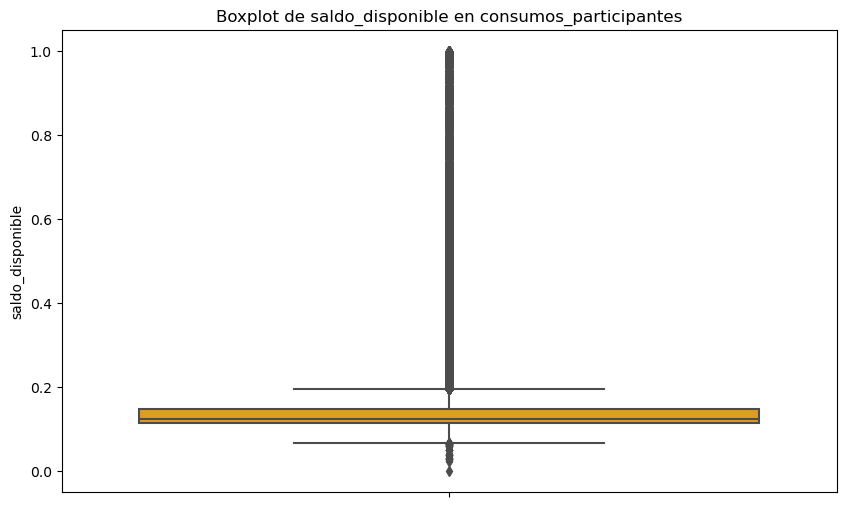

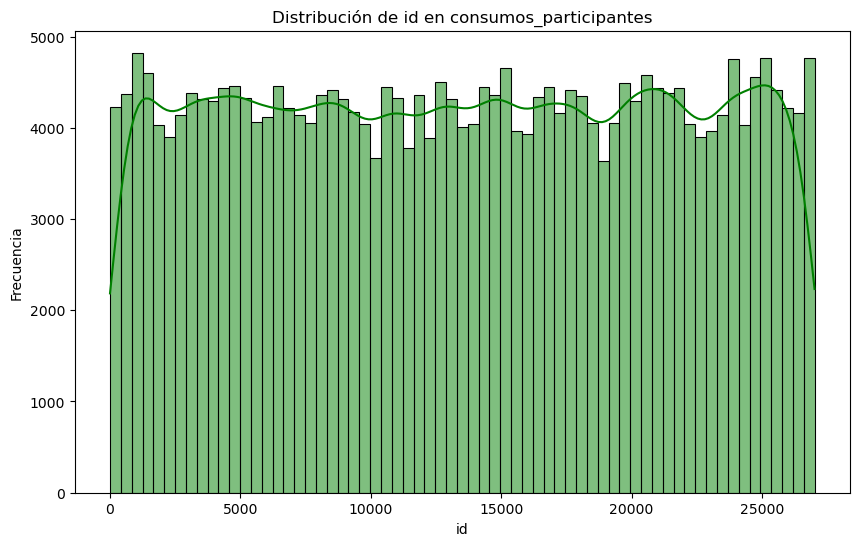

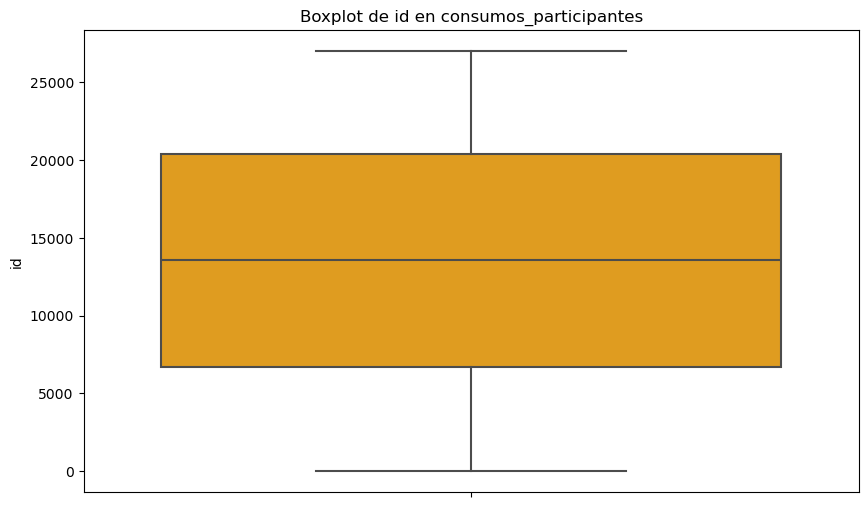

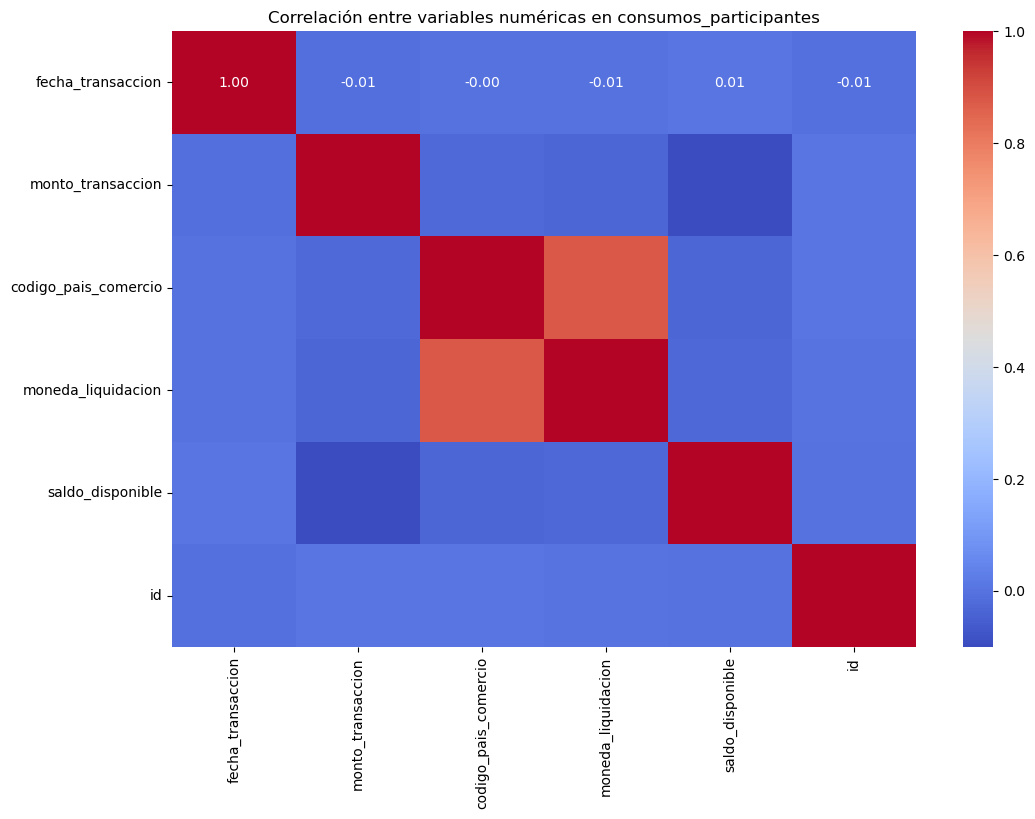


Visualizando df_target_participantes...



KeyboardInterrupt: 

In [27]:
# Función para identificar columnas categóricas y no categóricas
def identificar_columnas(df):
    categoricas = df.select_dtypes(include=['object', 'category']).columns.tolist()
    no_categoricas = df.select_dtypes(exclude=['object', 'category']).columns.tolist()
    return categoricas, no_categoricas

# Función para visualizar columnas categóricas
def visualizar_categoricas(df, nombre):
    categoricas, _ = identificar_columnas(df)
    for col in categoricas:
        plt.figure(figsize=(10, 6))
        df[col].value_counts().plot(kind='bar', color='skyblue')
        plt.title(f'Distribución de {col} en {nombre}')
        plt.ylabel('Frecuencia')
        plt.xlabel(col)
        plt.xticks(rotation=45)
        plt.show()

        plt.figure(figsize=(8, 8))
        df[col].value_counts().plot(kind='pie', autopct='%1.1f%%')
        plt.title(f'Porcentaje de {col} en {nombre}')
        plt.ylabel('')
        plt.show()

# Función para visualizar columnas numéricas
def visualizar_numericas(df, nombre):
    _, no_categoricas = identificar_columnas(df)
    for col in no_categoricas:
        plt.figure(figsize=(10, 6))
        sns.histplot(df[col].dropna(), kde=True, color='green')
        plt.title(f'Distribución de {col} en {nombre}')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')
        plt.show()

        plt.figure(figsize=(10, 6))
        sns.boxplot(y=df[col], color='orange')
        plt.title(f'Boxplot de {col} en {nombre}')
        plt.ylabel(col)
        plt.show()

# Función para visualizar relaciones entre variables numéricas
def visualizar_correlaciones(df, nombre):
    _, no_categoricas = identificar_columnas(df)
    if len(no_categoricas) > 1:
        plt.figure(figsize=(12, 8))
        sns.heatmap(df[no_categoricas].corr(), annot=True, cmap='coolwarm', fmt='.2f')
        plt.title(f'Correlación entre variables numéricas en {nombre}')
        plt.show()

# Función para aplicar Label Encoding
def aplicar_label_encoding(df):
    le = LabelEncoder()
    categoricas, _ = identificar_columnas(df)
    for col in categoricas:
        df[col] = le.fit_transform(df[col].astype(str))
    return df

# Procesar y visualizar cada dataframe
for df, nombre in zip([df1, df2, df3, df4, df5], 
                      ["consumos_participantes", "df_target_participantes", 
                       "df_cobros_participantes", "df_loans_participantes", "df_quejas_participantes"]):
    
    print(f'\nVisualizando {nombre}...\n')
    
    # Visualizar columnas categóricas
    visualizar_categoricas(df, nombre)
    
    # Aplicar Label Encoding
    df = aplicar_label_encoding(df)
    
    # Visualizar columnas numéricas
    visualizar_numericas(df, nombre)
    
    # Visualizar relaciones entre variables numéricas
    visualizar_correlaciones(df, nombre)

In [16]:



#/data/df_entrenamiento/df_quejas_participantes.csv

df1 = pd.read_csv("./data/df_entrenamiento/df_cobros_participantes.csv")
#print(df.shape)
df1.head(10)
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33623 entries, 0 to 33622
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   dias_atraso              33623 non-null  float64
 1   limite_credito           33623 non-null  float64
 2   fecha_activacion         33623 non-null  object 
 3   probabilidad_default_TC  21688 non-null  float64
 4   tiene_cuenta             33582 non-null  object 
 5   sector                   31026 non-null  object 
 6   ciudad                   32543 non-null  object 
 7   TC_garantizada           25597 non-null  object 
 8   id_ocupacion             11022 non-null  float64
 9   id_tipo_ocupacion        11022 non-null  float64
 10  nombre_ocupacion         11022 non-null  object 
 11  fecha_nacimiento         33546 non-null  object 
 12  id                       33623 non-null  object 
dtypes: float64(5), object(8)
memory usage: 3.3+ MB


In [6]:
df.describe()

monto_transaccion  saldo_disponible
count      277101.000000     277101.000000
mean            0.997338          0.156981
std             0.007906          0.103351
min             0.000000          0.000000
25%             0.997216          0.115184
50%             0.998860          0.122971
75%             0.999530          0.147566
max             1.000000          1.000000

In [ ]:
%reload_ext autoreload

# Transformacion de la Data

## Afiliados

In [3]:
extraer_afiliados()

In [4]:
#data_path="data/SISALRIL/afiliacion/Afiliacion_RC_PBS_02.xlsx"
datafile ='data/SISALRIL/afiliacion/RC_Afiliados_Edad_Sexo.csv'
#Extraer_Afiliados_Edad_Sexo(data_path,  archivocsv=datafile)
df_RC_Afiliados_Edad_Sexo = pd.read_csv(datafile)
#df_RC_Afiliados_Edad_Sexo.info()

In [5]:
#data_path = "data/SISALRIL/afiliacion/Afiliacion_RC_PBS_03.xlsx"
datafile = 'data/SISALRIL/afiliacion/RC_TasaDependencia_RC_ARS.csv'
#Extraer_TasaDependencia_RC_ARS(data_path,  archivocsv=datafile)
df_RC_TasaDependencia_RC_ARS = pd.read_csv(datafile)
#df_RC_TasaDependencia_RC_ARS.info()

In [4]:
#data_path = "data/SISALRIL/afiliacion/Afiliacion_RC_PBS_07.xlsx"
datafile= 'data/SISALRIL/afiliacion/RC_AfiliadosCotizantes_Edad_Sexo.csv'
#Extraer_AfiliadosCotizantes_Edad_Sexo(data_path,  archivocsv=datafile)
df_RC_AfiliadosCotizantes_Edad_Sexo = pd.read_csv(datafile)
df_RC_AfiliadosCotizantes_Edad_Sexo['Cotizante'] = 'SI'
#df_RC_AfiliadosCotizantes_Edad_Sexo.info()

# data_path = "data/SISALRIL/afiliacion/Afiliacion_RC_PBS_08.xlsx"
datafile= 'data/SISALRIL/afiliacion/RC_AfiliadosNoCotizantes_Edad_Sexo.csv'
# Extraer_AfiliadosNoCotizantes_Edad_Sexo(data_path,  archivocsv=datafile)
df_RC_AfiliadosNoCotizantes_Edad_Sexo = pd.read_csv(datafile)
df_RC_AfiliadosNoCotizantes_Edad_Sexo['Cotizante'] = 'NO'
#df_RC_AfiliadosNoCotizantes_Edad_Sexo.info()

In [5]:

# Cargar los DataFrames
df1 = df_RC_AfiliadosCotizantes_Edad_Sexo
df2 = df_RC_AfiliadosNoCotizantes_Edad_Sexo


# Definir el nombre del archivo de salida
output_file = 'data/SISALRIL/financiamiento/Afiliados_Edad_Sexo_Cotizacion.csv'## nombre del archivo CSV a ser guardado
df_concatenated = pd.concat([df1, df2],ignore_index=True)
df_concatenated['Total Afiliados'].fillna(df_concatenated['Total Cotizantes'], inplace=True)

# Eliminar la columna "Total Cotizantes"
df_concatenated.drop(columns=['Total Cotizantes'], inplace=True)

print(df_concatenated.info())
df_concatenated.to_csv(output_file, index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Periodo de Cobertura  780 non-null    object 
 1   15-19                 780 non-null    int64  
 2   20-24                 780 non-null    int64  
 3   25-29                 780 non-null    int64  
 4   30-34                 780 non-null    int64  
 5   35-39                 780 non-null    int64  
 6   40-44                 780 non-null    int64  
 7   45-49                 780 non-null    int64  
 8   50-54                 780 non-null    int64  
 9   55-59                 780 non-null    int64  
 10  60-64                 780 non-null    int64  
 11  65-69                 780 non-null    int64  
 12  70-74                 780 non-null    int64  
 13  75-79                 780 non-null    int64  
 14  80-84                 780 non-null    int64  
 15  85 y mas              7

In [8]:
# data_path = "data/SISALRIL/afiliacion/Afiliacion_RC_PBS_04.xlsx"
datafile= 'data/SISALRIL/afiliacion/RC_Tabla_Regiones.csv'
# Extraer_Tabla_Regiones(data_path,  archivocsv=datafile)
df_RC_Tabla_Regiones = pd.read_csv(datafile)
df_RC_Tabla_Regiones['Región Geográfica/2'].unique()


array(['Región Distrito Nacional', 'Región Este', 'Región Norte',
       'Región Sur'], dtype=object)

In [9]:
# data_path = "data/SISALRIL/afiliacion/Afiliacion_RC_PBS_04.xlsx"
datafile ='data/SISALRIL/afiliacion/RC_Datos_Regionales.csv'
# Extraer_datos_regionales(data_path, header_=7, rows_=54-7, archivocsv=datafile)
df_RC_Datos_Regionales = pd.read_csv(datafile)
#df_RC_Datos_Regionales.info()

In [10]:
# data_path = "data/SISALRIL/afiliacion/Afiliacion_RC_PBS_05.xlsx"
datafile ='data/SISALRIL/afiliacion/RC_Datos_Regionales_Cotizantes.csv'
# Extraer_datos_regionales(data_path, header_=7, rows_=54-7, archivocsv=datafile)
df_RC_Datos_Regionales_Cotizantes = pd.read_csv(datafile)
df_RC_Datos_Regionales_Cotizantes['Cotizante']='SI'
#df_RC_Datos_Regionales_Cotizantes.info()
# data_path = "data/SISALRIL/afiliacion/Afiliacion_RC_PBS_06.xlsx"
datafile ='data/SISALRIL/afiliacion/RC_Datos_Regionales_NoCotizantes.csv'
# Extraer_datos_regionales(data_path, header_=6, rows_=54-7, archivocsv=datafile)
df_RC_Datos_Regionales_NoCotizantes = pd.read_csv(datafile)
df_RC_Datos_Regionales_NoCotizantes['Cotizante']='NO'
#df_RC_Datos_Regionales_NoCotizantes.info()

In [11]:

# Cargar los DataFrames
df1 = df_RC_Datos_Regionales_Cotizantes
df2 = df_RC_Datos_Regionales_NoCotizantes
# Corregir los nombres de las columnas con los acentos adecuados
df1 = df1.rename(columns={'Samaná': 'Samana', 'San José de Ocoa': 'San Jose de Ocoa','San jose de Ocoa': 'San Jose de Ocoa'})
df2 = df2.rename(columns={'Samaná': 'Samana', 'San José de Ocoa': 'San Jose de Ocoa','San jose de Ocoa': 'San Jose de Ocoa'})


# Definir el nombre del archivo de salida
output_file = 'data/SISALRIL/financiamiento/RC_Datos_Regionales_Cotizacion.csv'## nombre del archivo CSV a ser guardado
df_concatenated = pd.concat([df1, df2],ignore_index=True)
print(df_concatenated.info())
df_concatenated.to_csv(output_file, index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 51 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Total general                   392 non-null    int64 
 1   Total Región Distrito Nacional  392 non-null    int64 
 2   Total 0 - Santo Domingo         392 non-null    int64 
 3   Distrito Nacional               392 non-null    int64 
 4   Monte Plata                     392 non-null    int64 
 5   Santo Domingo                   392 non-null    int64 
 6   Total Región Este               392 non-null    int64 
 7   Total V - Este                  392 non-null    int64 
 8   El Seybo                        392 non-null    int64 
 9   Hato Mayor del Rey              392 non-null    int64 
 10  La Altagracia                   392 non-null    int64 
 11  La Romana                       392 non-null    int64 
 12  San Pedro de Macorís            392 non-null    in

In [12]:
df1 = df_RC_Datos_Regionales_Cotizantes
df2 = df_RC_Datos_Regionales_NoCotizantes

# Agregar la columna 'Cotizante' a cada DataFrame
df1['Cotizante'] = 'SI'
df2['Cotizante'] = 'NO'

# Corregir los nombres de las columnas con los acentos adecuados
df1 = df1.rename(columns={'Samaná': 'Samana', 'San José de Ocoa': 'San Jose de Ocoa', 'San jose de Ocoa': 'San Jose de Ocoa'})
df2 = df2.rename(columns={'Samaná': 'Samana', 'San José de Ocoa': 'San Jose de Ocoa', 'San jose de Ocoa': 'San Jose de Ocoa'})

# Concatenar los DataFrames
df_concatenated = pd.concat([df1, df2], ignore_index=True)

# Definir el nombre del archivo de salida
output_file = 'data/SISALRIL/financiamiento/RC_Datos_Regionales_Cotizacion.csv'
df_concatenated.to_csv(output_file, index=False)

# Seleccionar solo las columnas que contienen la palabra "Total"
columnas_totales = [col for col in df_concatenated.columns if 'Total' in col]
columnas_totales.append('Cotizante')

# Filtrar las columnas necesarias en los DataFrames filtrados
df_RC_Datos_Regionales_Total = df_concatenated[['Periodo de Cobertura', 'Year', 'Month'] + columnas_totales]

# Guardar el DataFrame merge en un archivo CSV
nombre_df_merge = "RC_Region_Salud_Total"
ruta_archivo_csv = f"data/SISALRIL/afiliacion/{nombre_df_merge}.csv"
df_RC_Datos_Regionales_Total.to_csv(ruta_archivo_csv, index=False)

# Mostrar información del DataFrame
print(df_RC_Datos_Regionales_Total.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Periodo de Cobertura            392 non-null    object
 1   Year                            392 non-null    int64 
 2   Month                           392 non-null    int64 
 3   Total general                   392 non-null    int64 
 4   Total Región Distrito Nacional  392 non-null    int64 
 5   Total 0 - Santo Domingo         392 non-null    int64 
 6   Total Región Este               392 non-null    int64 
 7   Total V - Este                  392 non-null    int64 
 8   Total Región Norte              392 non-null    int64 
 9   Total II - Norcentral           392 non-null    int64 
 10  Total III - Nordeste            392 non-null    int64 
 11  Total VII - Cibao Occidental    392 non-null    int64 
 12  Total VIII - Cibao Central      392 non-null    in

In [13]:
merged_df = df_concatenated
# Filtrar las columnas necesarias después del merge
regiones_geograficas = df_RC_Tabla_Regiones['Región Geográfica/2'].unique()
columnas_regionales = [col for col in merged_df.columns if any(region in col for region in regiones_geograficas)]
columnas_totales_generales = [col for col in merged_df.columns if 'Total general' in col]
columnas_totales_generales.append('Cotizante')
merged_df = merged_df[['Periodo de Cobertura', 'Year', 'Month'] + columnas_totales_generales + columnas_regionales]

nombre_df_merge = "RC_Region_Geografica_Total_Combinado"
# Guardar el DataFrame merge en un archivo CSV
ruta_archivo_csv = f"data/SISALRIL/afiliacion/{nombre_df_merge}.csv"
merged_df.to_csv(ruta_archivo_csv, index=False)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Periodo de Cobertura            392 non-null    object
 1   Year                            392 non-null    int64 
 2   Month                           392 non-null    int64 
 3   Total general                   392 non-null    int64 
 4   Cotizante                       392 non-null    object
 5   Total Región Distrito Nacional  392 non-null    int64 
 6   Total Región Este               392 non-null    int64 
 7   Total Región Norte              392 non-null    int64 
 8   Total Región Sur                392 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 27.7+ KB


In [14]:
# data_path = "data/SISALRIL/afiliacion/Afiliacion_SFS_PBS_03.xlsx"
datafile = 'data/SISALRIL/afiliacion/SFS_Afiliacion_Tasa_Regimen.csv'
# Extraer_SFS_Afiliacion_Tasa_Regimen(data_path,  archivocsv=datafile)
df_SFS_Afiliacion_Tasa_Regimen = pd.read_csv(datafile)
#df_SFS_Afiliacion_Tasa_Regimen.info()

# data_path = "data/SISALRIL/afiliacion/Afiliacion_SFS_PBS_05.xlsx"
datafile = 'data/SISALRIL/afiliacion/SFS_Regimen_Sexo.csv'
# Extraer_SFS_Regimen_Sexo(data_path,  archivocsv=datafile)
df_SFS_Regimen_Sexo = pd.read_csv(datafile)
#df_SFS_Regimen_Sexo.info()

# data_path = "data/SISALRIL/afiliacion/Afiliacion_SFS_PBS_07.xlsx"
datafile = 'data/SISALRIL/afiliacion/SFS_Porcentaje_Regimen.csv'
# Extraer_SFS_Porcentaje_Regimen(data_path,  archivocsv=datafile)
df_SFS_Porcentaje_Regimen = pd.read_csv(datafile)
#df_SFS_Porcentaje_Regimen.info()



In [15]:

#merge_and_save_dataframes(dfs, output_file, on_columns, suffixes):
# Cargar los DataFrames
df1 = df_SFS_Regimen_Sexo
df2 = df_SFS_Porcentaje_Regimen
df3 = df_SFS_Afiliacion_Tasa_Regimen

# Definir el nombre del archivo de salida
output_file = 'data/SISALRIL/financiamiento/SFS_Regimen_Sexo_Porcentaje_Tasa.csv'
# Definir las columnas para realizar la unión
on_columns = ["Periodo de Cobertura", "Year", "Month"]

# Definir los sufijos para las columnas de los DataFrames
suffixes = ('_Regimen_Sexo', '_Porcentaje','tasa_regimen')

# Llamar a la función para unir y guardar los DataFrames
merge_and_save_dataframes([df1, df2,df3], output_file, on_columns, suffixes)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 0 to 195
Data columns (total 22 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Periodo de Cobertura                         196 non-null    object 
 1   SFS_Total                                    196 non-null    int64  
 2   SFS_Hombres                                  196 non-null    int64  
 3   SFS_Mujeres                                  196 non-null    int64  
 4   Reg_Subsidiado_Total                         196 non-null    int64  
 5   Reg_Subsidiado_Hombres                       196 non-null    int64  
 6   Reg_Subsidiado_Mujeres                       196 non-null    int64  
 7   RC_Total                                     196 non-null    int64  
 8   RC_Hombres                                   196 non-null    int64  
 9   RC_Mujeres                                   196 non-null    int64  
 10  Ye

In [16]:
# Tablas seleccionadas
output_file = 'data/SISALRIL/financiamiento/Afiliados_Edad_Sexo_Cotizacion.csv'## nombre del archivo CSV a ser guardado
datafile= 'data/SISALRIL/afiliacion/RC_Tabla_Regiones.csv'
output_file = 'data/SISALRIL/financiamiento/RC_Datos_Regionales_Cotizacion.csv'## nombre del archivo CSV a ser guardado
#nombre_df_merge = "" ruta_archivo_csv = f"data/SISALRIL/afiliacion/{nombre_df_merge}.csv"
file ="data/SISALRIL/afiliacion/RC_Region_Salud_Total.csv"
#nombre_df_merge = "RC_Region_Geografica_Total_Combinado"ruta_archivo_csv = f"data/SISALRIL/afiliacion/{nombre_df_merge}.csv"
file ="data/SISALRIL/afiliacion/RC_Region_Geografica_Total_Combinado.csv"
output_file = 'data/SISALRIL/financiamiento/SFS_Regimen_Sexo_Porcentaje_Tasa.csv'

## Financiamiento


In [17]:
extraer_financiamiento()

In [18]:
data_path = "data/SISALRIL/financiamiento/Financiamiento_RC_PBS_01.xlsx"
datafile = 'data/SISALRIL/financiamiento/CapitasDispersadoARS_TipoAfiliado_postMes.csv'

df_RC_CapitasDispersadoARS_TipoAfiliado_postMes = pd.read_csv(datafile)
#print(df_RC_CapitasDispersadoARS_TipoAfiliado_postMes.info())

data_path = "data/SISALRIL/financiamiento/Financiamiento_RC_PBS_01.xlsx"
datafile = 'data/SISALRIL/financiamiento/MontoDispersadoARS_TipoAfiliado_postMes.csv'
df_RC_MontoDispersadoARS_TipoAfiliado_postMes = pd.read_csv(datafile)
df = df_RC_MontoDispersadoARS_TipoAfiliado_postMes

nuevas_columnas = {col: col.replace("Capitas", "Monto") for col in df.columns}
df = df.rename(columns=nuevas_columnas)
df_RC_MontoDispersadoARS_TipoAfiliado_postMes =df
df.to_csv(datafile, index=False)
#print(df_RC_MontoDispersadoARS_TipoAfiliado_postMes.info())



In [19]:

#merge_and_save_dataframes(dfs, output_file, on_columns, suffixes):
# Cargar los DataFrames
df1 = df_RC_CapitasDispersadoARS_TipoAfiliado_postMes
df2 = df_RC_MontoDispersadoARS_TipoAfiliado_postMes


# Definir el nombre del archivo de salida
output_file = 'data/SISALRIL/financiamiento/Financiamiento_DispersadoARS_TipoAfiliado_postMes.csv'
# Definir las columnas para realizar la unión
on_columns = ["Periodo de Cobertura", "Year", "Month"]

# Definir los sufijos para las columnas de los DataFrames
suffixes = ('_capitas', '_monto')

# Llamar a la función para unir y guardar los DataFrames
merge_and_save_dataframes([df1, df2], output_file, on_columns, suffixes)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 0 to 195
Data columns (total 27 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Periodo de Cobertura                         196 non-null    object
 1   Total_Capitas_Dispersadas                    196 non-null    int64 
 2   Total_Capitas_Dispersada_mes                 196 non-null    int64 
 3   Total_Capitas_Dispersada_posterior           196 non-null    int64 
 4   Titulares_Total_capitas                      196 non-null    int64 
 5   Titulares_Dispersadas_mes_capitas            196 non-null    int64 
 6   Titulares_Dispersadas_posterior_capitas      196 non-null    int64 
 7   Dependientes_Total_capitas                   196 non-null    int64 
 8   Dependientes_Dispersadas_mes_capitas         196 non-null    int64 
 9   Dependientess_Dispersadas_posterior_capitas  196 non-null    int64 
 10  Adicionales_To

In [20]:
data_path = "data/SISALRIL/financiamiento/Financiamiento_RC_PBS_03.xlsx"
datafile = 'data/SISALRIL/financiamiento/CapitasDispersadoARS_Autogestion_postMes.csv'
df_RC_CapitasDispersadoARS_Autogestion_postMes = pd.read_csv(datafile)
#print(df_RC_CapitasDispersadoARS_Autogestion_postMes.info())

data_path = "data/SISALRIL/financiamiento/Financiamiento_RC_PBS_03.xlsx"
datafile = 'data/SISALRIL/financiamiento/MontoDispersadoARS_Autogestion_postMes.csv'
df_RC_MontoDispersadoARS_Autogestion_postMes = pd.read_csv(datafile)
df = df_RC_MontoDispersadoARS_Autogestion_postMes
nuevas_columnas = {col: col.replace("Capitas", "Monto") for col in df.columns}
df = df.rename(columns=nuevas_columnas)
df_RC_MontoDispersadoARS_Autogestion_postMes =df
df.to_csv(datafile, index=False)
#print(df_RC_MontoDispersadoARS_Autogestion_postMes.info())

In [21]:
# Cargar los DataFrames
df1 = df_RC_CapitasDispersadoARS_Autogestion_postMes
df2 = df_RC_MontoDispersadoARS_Autogestion_postMes


# Realizar la unión de los DataFrames
df_union = pd.merge(df1, df2, on=["Periodo de Cobertura", "Year", "Month"],suffixes=('_capitas', '_monto'))

# Guardar el resultado en un archivo CSV
output_file = 'data/SISALRIL/financiamiento/Financiamiento_DispersadoARS_Autogestion_postMes.csv'
df_union['Tipo_de_ARS'] ='Autogestion'
#print(df_union.info())
df_union.to_csv(output_file, index=False)

# Imprimir información 

In [22]:
data_path = "data/SISALRIL/financiamiento/Financiamiento_RC_PBS_04.xlsx"
datafile = 'data/SISALRIL/financiamiento/CapitasDispersadoARS_Privada_postMes.csv'
df_RC_CapitasDispersadoARS_Privada_postMes = pd.read_csv(datafile)

#print(df_RC_CapitasDispersadoARS_Privada_postMes.info())

data_path = "data/SISALRIL/financiamiento/Financiamiento_RC_PBS_04.xlsx"
datafile = 'data/SISALRIL/financiamiento/MontoDispersadoARS_Privada_postMes.csv'
df_RC_MontoDispersadoARS_Privada_postMes = pd.read_csv(datafile)
df = df_RC_MontoDispersadoARS_Privada_postMes
nuevas_columnas = {col: col.replace("Capitas", "Monto") for col in df.columns}
df = df.rename(columns=nuevas_columnas)
df_RC_MontoDispersadoARS_Privada_postMes =df
df.to_csv(datafile, index=False)
#print(df_RC_MontoDispersadoARS_Privada_postMes.info())

In [23]:
# Cargar los DataFrames
df1 = df_RC_CapitasDispersadoARS_Privada_postMes
df2 = df_RC_MontoDispersadoARS_Privada_postMes


# Realizar la unión de los DataFrames
df_union = pd.merge(df1, df2, on=["Periodo de Cobertura", "Year", "Month"],suffixes=('_capitas', '_monto'))

# Guardar el resultado en un archivo CSV
output_file = 'data/SISALRIL/financiamiento/Financiamiento_DispersadoARS_Privada_postMes.csv'
df_union['Tipo_de_ARS'] ='Privada'
#print(df_union.info())
df_union.to_csv(output_file, index=False)

In [24]:
data_path = "data/SISALRIL/financiamiento/Financiamiento_RC_PBS_05.xlsx"
datafile = 'data/SISALRIL/financiamiento/CapitasDispersadoARS_Publicas_postMes.csv'
df_RC_CapitasDispersadoARS_Publicas_postMes = pd.read_csv(datafile)
#print(df_RC_CapitasDispersadoARS_Publicas_postMes.info())
data_path = "data/SISALRIL/financiamiento/Financiamiento_RC_PBS_05.xlsx"
datafile = 'data/SISALRIL/financiamiento/MontoDispersadoARS_Publicas_postMes.csv'
df_RC_MontoDispersadoARS_Publicas_postMes = pd.read_csv(datafile)
df = df_RC_MontoDispersadoARS_Publicas_postMes
nuevas_columnas = {col: col.replace("Capitas", "Monto") for col in df.columns}
df = df.rename(columns=nuevas_columnas)
df_RC_MontoDispersadoARS_Publicas_postMes =df
df.to_csv(datafile, index=False)
#print(df_RC_MontoDispersadoARS_Publicas_postMes.info())

In [25]:
# Cargar los DataFrames
df1 = df_RC_CapitasDispersadoARS_Publicas_postMes
df2 = df_RC_MontoDispersadoARS_Publicas_postMes


# Realizar la unión de los DataFrames
df_union = pd.merge(df1, df2, on=["Periodo de Cobertura", "Year", "Month"],suffixes=('_capitas', '_monto'))

# Guardar el resultado en un archivo CSV
output_file = 'data/SISALRIL/financiamiento/Financiamiento_DispersadoARS_Publicas_postMes.csv'
df_union['Tipo_de_ARS'] ='Publica'
#print(df_union.info())
df_union.to_csv(output_file, index=False)




In [26]:
output_file1 = 'data/SISALRIL/financiamiento/Financiamiento_DispersadoARS_Autogestion_postMes.csv'
output_file2 = 'data/SISALRIL/financiamiento/Financiamiento_DispersadoARS_Privada_postMes.csv'
output_file3 = 'data/SISALRIL/financiamiento/Financiamiento_DispersadoARS_Publicas_postMes.csv'


# Cargar los DataFrames
df1 = pd.read_csv(output_file1)
df2 = pd.read_csv(output_file2)
df3 = pd.read_csv(output_file3)

# Definir las columnas para realizar la unión
on_columns = ["Periodo de Cobertura", "Year", "Month"]

# Definir el nombre del archivo de salida
output_file = 'data/SISALRIL/financiamiento/Financiamiento_Dispersado_TipoARS_postMes.csv'## nombre del archivo CSV a ser guardado
df_concatenated = pd.concat([df1, df2, df3],ignore_index=True)
print(df_concatenated.info())
df_concatenated.to_csv(output_file, index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 28 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Periodo de Cobertura                         588 non-null    object
 1   Total_Capitas_Dispersadas                    588 non-null    int64 
 2   Total_Capitas_Dispersada_mes                 588 non-null    int64 
 3   Total_Capitas_Dispersada_posterior           588 non-null    int64 
 4   Titulares_Total_capitas                      588 non-null    int64 
 5   Titulares_Dispersadas_mes_capitas            588 non-null    int64 
 6   Titulares_Dispersadas_posterior_capitas      588 non-null    int64 
 7   Dependientes_Total_capitas                   588 non-null    int64 
 8   Dependientes_Dispersadas_mes_capitas         588 non-null    int64 
 9   Dependientess_Dispersadas_posterior_capitas  588 non-null    int64 
 10  Adicionales_To

In [27]:
data_path = "data/SISALRIL/financiamiento/Financiamiento_RC_SFS_01.xlsx"
datafile = 'data/SISALRIL/financiamiento/MontoSFS_Periodo_Cuenta.csv'
df_RC_MontoSFS_Periodo_Cuenta = pd.read_csv(datafile)
#print(df_RC_MontoSFS_Periodo_Cuenta.info())
data_path = "data/SISALRIL/financiamiento/Financiamiento_SFS_03.xlsx"
datafile = 'data/SISALRIL/financiamiento/SFS_TopeSalarioMinimoContizable.csv'
df_RC_SFS_TopeSalarioMinimoContizable = pd.read_csv(datafile)
#print(df_RC_SFS_TopeSalarioMinimoContizable.info())

In [28]:

data_path = "data/SISALRIL/financiamiento/Financiamiento_RC_PBS_02.xlsx"
datafile = 'data/SISALRIL/financiamiento/MontoDispersado_TipoAfiliado_Periodo.csv'
df_RC_MontoDispersado_TipoAfiliado_Periodo = pd.read_csv(datafile)
df = df_RC_MontoDispersado_TipoAfiliado_Periodo
#nuevas_columnas = {col: col.replace("Capitas", "Monto") for col in df.columns}
df = df.rename(columns=nuevas_columnas)
df_RC_MontoDispersado_TipoAfiliado_Periodo =df
df.to_csv(datafile, index=False)
#print(df_RC_MontoDispersado_TipoAfiliado_Periodo.info())



#merge_and_save_dataframes(dfs, output_file, on_columns, suffixes):
# Cargar los DataFrames
df1 = df_RC_MontoSFS_Periodo_Cuenta
df2 = df_RC_SFS_TopeSalarioMinimoContizable
df3 = df_RC_MontoDispersado_TipoAfiliado_Periodo

# Definir las columnas para realizar la unión
on_columns = ["Periodo de Cobertura", "Year", "Month"]

# Definir los sufijos para las columnas de los DataFrames
suffixes = ('_capitas', '_monto')

# Definir el nombre del archivo de salida
output_file = 'data/SISALRIL/financiamiento/Financiamiento_Dispersado_Salario.csv'

# Llamar a la función para unir y guardar los DataFrames
df_union = merge_and_save_dataframes([df1, df2, df3], output_file, on_columns, suffixes)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 0 to 195
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Periodo de Cobertura                    196 non-null    object 
 1   Total Empresas con aportes              196 non-null    int64  
 2   Recaudo SFS                             196 non-null    float64
 3   Cuidado de la Salud                     196 non-null    float64
 4   Estancias Infantiles                    196 non-null    float64
 5   Subsidios                               196 non-null    float64
 6   Comisión Operación SISALRIL             196 non-null    float64
 7   Cápita Adicional                        196 non-null    float64
 8   Recargo por Atraso en pago de Facturas  196 non-null    float64
 9   Year                                    196 non-null    int64  
 10  Month                                   196 non-null    int64 

In [29]:
 names_ =  [
                'Ano de Cobertura',    
                'Total_Salud (A)',
                'PDSS_Subsidiado (A)',
                'PDSS_Contributivo (A)',
                'Otros_Planes_de_Salud (A)',
                'PIB/Precios Corrientes (B)',
                'Total en Relación al PIB (A/B)',
                'PDSS_Subsidiado en Relación al PIB (A/B)',
                'PDSS_Contributivo en Relación al PIB (A/B)',
                'Otros_Planes_de_Salud en Relación al PIB (A/B)'
            ]
data_path = "data/SISALRIL/financiamiento/Financiamiento_SFS_05.xlsx"
datafile = 'data/SISALRIL/financiamiento/GastoSalud_PIB.csv'
##Extraer_FinanciamientoAnual(data_path, header_=9, rows_=23-9, skip=9, columns_="A:J", column_names=names_, archivocsv=datafile)

df_RC_GastoSalud_PIB = pd.read_csv(datafile)
#print(df_RC_GastoSalud_PIB.head())
data_path = "data/SISALRIL/financiamiento/Financiamiento_SFS_PBS_01.xlsx"
datafile = 'data/SISALRIL/financiamiento/MontoARS_PBS_Regimen.csv'
df_RC_MontoARS_PBS_Regimen = pd.read_csv(datafile)
#print(df_RC_MontoARS_PBS_Regimen.head())

In [30]:


#merge_and_save_dataframes(df1, df2, output_file, on_columns, suffixes):
df1 = df_RC_GastoSalud_PIB
df2 = df_RC_MontoARS_PBS_Regimen
datafile = 'data/SISALRIL/financiamiento/FinanciamientoARS_SaludPIB_Regimen.csv'
on_columns = ['Ano de Cobertura']
suffixes=('_capitas', '_monto')
merge_and_save_dataframes([df1,df2],datafile,on_columns,suffixes)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 0 to 13
Data columns (total 13 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Ano de Cobertura                                14 non-null     int64  
 1   Total_Salud (A)                                 14 non-null     float64
 2   PDSS_Subsidiado (A)                             14 non-null     float64
 3   PDSS_Contributivo (A)                           14 non-null     float64
 4   Otros_Planes_de_Salud (A)                       14 non-null     float64
 5   PIB/Precios Corrientes (B)                      14 non-null     float64
 6   Total en Relación al PIB (A/B)                  14 non-null     float64
 7   PDSS_Subsidiado en Relación al PIB (A/B)        14 non-null     float64
 8   PDSS_Contributivo en Relación al PIB (A/B)      14 non-null     float64
 9   Otros_Planes_de_Salud en Relación al PIB (A/B

In [31]:
# Tablas seleccionadas adiliados
output_file = 'data/SISALRIL/financiamiento/Afiliados_Edad_Sexo_Cotizacion.csv'## nombre del archivo CSV a ser guardado
datafile= 'data/SISALRIL/afiliacion/RC_Tabla_Regiones.csv'
output_file = 'data/SISALRIL/financiamiento/RC_Datos_Regionales_Cotizacion.csv'## nombre del archivo CSV a ser guardado
#nombre_df_merge = "" ruta_archivo_csv = f"data/SISALRIL/afiliacion/{nombre_df_merge}.csv"
file ="data/SISALRIL/afiliacion/RC_Region_Salud_Total.csv"
#nombre_df_merge = "RC_Region_Geografica_Total_Combinado"ruta_archivo_csv = f"data/SISALRIL/afiliacion/{nombre_df_merge}.csv"
file ="data/SISALRIL/afiliacion/RC_Region_Geografica_Total_Combinado.csv"
output_file = 'data/SISALRIL/financiamiento/SFS_Regimen_Sexo_Porcentaje_Tasa.csv'

# Tablas seleccionadas Financiamiento
output_file = 'data/SISALRIL/financiamiento/Financiamiento_Dispersado_TipoARS_postMes.csv'
output_file = 'data/SISALRIL/financiamiento/Financiamiento_Dispersado_Salario.csv'
datafile = 'data/SISALRIL/financiamiento/FinanciamientoARS_SaludPIB_Regimen.csv'



## Prestaciones

In [32]:
extraer_prestaciones()

In [33]:
names_ =  [
        'Ano de Cobertura',
        'Grupo Numero',
        'Grupo Descripcion ',
        'Servicios Prestados',
        'Distribucion Porcentual ',
    ]
data_path = "data/SISALRIL/prestaciones/Prestaciones_RC_PBS_02.xlsx"
datafile = 'data/SISALRIL/prestaciones/PrestacionesPBS_Servicios.csv'
#  Extraer_PrestacionesPBS(data_path, header_=7, rows_=231-7, skip=7, columns_="A:E", column_names=names_, archivocsv=datafile)
df_PrestacionesPBS_Servicios = pd.read_csv(datafile)
#print(df_PrestacionesPBS_Servicios.head())

data_path = "data/SISALRIL/prestaciones/Prestaciones_RC_PBS_01.xlsx"
datafile = 'data/SISALRIL/prestaciones/PrestacionesPBS_Monto.csv'
## Extraer_PrestacionesPBS(data_path, header_=6, rows_=230-6, skip=6, columns_="A:E",  archivocsv=datafile)
df_PrestacionesPBS_Monto = pd.read_csv(datafile)
#print(df_PrestacionesPBS_Monto.head())

In [34]:

#merge_and_save_dataframes(df1, df2, output_file, on_columns, suffixes):
df1 = df_PrestacionesPBS_Servicios
df2 = df_PrestacionesPBS_Monto

datafile = 'data/SISALRIL/financiamiento/PrestacionesPBS.csv'
on_columns = ['Ano de Cobertura', 'Grupo Numero','Grupo Descripcion ']
suffixes=('_capitas', '_monto')
merge_and_save_dataframes([df1,df2],datafile,on_columns,suffixes)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 207 entries, 0 to 206
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Ano de Cobertura                  207 non-null    int64  
 1   Grupo Numero                      207 non-null    float64
 2   Grupo Descripcion                 207 non-null    object 
 3   Servicios Prestados               207 non-null    int64  
 4   Distribucion Porcentual _capitas  207 non-null    float64
 5   Montos Pagados                    207 non-null    float64
 6   Distribucion Porcentual _monto    207 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 12.9+ KB
None


In [35]:
# Tablas seleccionadas adiliados
output_file = 'data/SISALRIL/financiamiento/Afiliados_Edad_Sexo_Cotizacion.csv'## nombre del archivo CSV a ser guardado
datafile= 'data/SISALRIL/afiliacion/RC_Tabla_Regiones.csv'
output_file = 'data/SISALRIL/financiamiento/RC_Datos_Regionales_Cotizacion.csv'## nombre del archivo CSV a ser guardado
#nombre_df_merge = "" ruta_archivo_csv = f"data/SISALRIL/afiliacion/{nombre_df_merge}.csv"
file ="data/SISALRIL/afiliacion/RC_Region_Salud_Total.csv"
#nombre_df_merge = "RC_Region_Geografica_Total_Combinado"ruta_archivo_csv = f"data/SISALRIL/afiliacion/{nombre_df_merge}.csv"
file ="data/SISALRIL/afiliacion/RC_Region_Geografica_Total_Combinado.csv"
output_file = 'data/SISALRIL/financiamiento/SFS_Regimen_Sexo_Porcentaje_Tasa.csv'

# Tablas seleccionadas Financiamiento
output_file = 'data/SISALRIL/financiamiento/Financiamiento_Dispersado_TipoARS_postMes.csv'
output_file = 'data/SISALRIL/financiamiento/Financiamiento_Dispersado_Salario.csv'
datafile = 'data/SISALRIL/financiamiento/FinanciamientoARS_SaludPIB_Regimen.csv'

#Tablas seleccionadas prestaciones
datafile = 'data/SISALRIL/financiamiento/PrestacionesPBS.csv'


## Siniestralidad

In [36]:
extraer_siniestralidad()

In [37]:
data_path = "data/SISALRIL/siniestralidad/Siniestralidad_RC_PBS_01.xlsx"
datafile = 'data/SISALRIL/siniestralidad/RC_Ingresos_Gastos_Siniestralidad.csv'

#  Extraer_PrestacionesPBS(data_path, header_=7, rows_=231-7, skip=7, columns_="A:E", column_names=names_, archivocsv=datafile)
df_RC_Ingresos_Gastos_Siniestralidad = pd.read_csv(datafile)
#print(df_RC_Ingresos_Gastos_Siniestralidad.info())

data_path = "data/SISALRIL/siniestralidad/Sinestralidad_OP_01.xlsx"
datafile = 'data/SISALRIL/siniestralidad/OP_Ingresos_Gastos_Siniestralidad.csv'
#  Extraer_PrestacionesPBS(data_path, header_=7, rows_=231-7, skip=7, columns_="A:E", column_names=names_, archivocsv=datafile)
df_OP_Ingresos_Gastos_Siniestralidad = pd.read_csv(datafile)
#print(df_OP_Ingresos_Gastos_Siniestralidad.info())

data_path = "data/SISALRIL/siniestralidad/Siniestralidad_RC_PBS_02.xlsx"
datafile = 'data/SISALRIL/siniestralidad/RC_Ingresos_Gastos_Siniestralidad_Anual.csv'

#  Extraer_PrestacionesPBS(data_path, header_=7, rows_=231-7, skip=7, columns_="A:E", column_names=names_, archivocsv=datafile)
df_RC_Ingresos_Gastos_Siniestralidad_Anual = pd.read_csv(datafile)
#print(df_RC_Ingresos_Gastos_Siniestralidad_Anual.info())

data_path = "data/SISALRIL/siniestralidad/Sinestralidad_OP_02.xlsx"
datafile = 'data/SISALRIL/siniestralidad/OP_Ingresos_Gastos_Siniestralidad_Anual.csv'

#  Extraer_PrestacionesPBS(data_path, header_=7, rows_=231-7, skip=7, columns_="A:E", column_names=names_, archivocsv=datafile)
df_OP_Ingresos_Gastos_Siniestralidad_Anual = pd.read_csv(datafile)
#print(df_OP_Ingresos_Gastos_Siniestralidad_Anual.info())


In [38]:
#merge_and_save_dataframes(df1, df2, output_file, on_columns, suffixes):
df1 = df_RC_Ingresos_Gastos_Siniestralidad
df2 =df_OP_Ingresos_Gastos_Siniestralidad
datafile = 'data/SISALRIL/siniestralidad/Ingresos_Gastos_Siniestralidad.csv' 
on_columns = ["Periodo de Cobertura", "Year", "Month"]
suffixes=('_RC', '_OP')
merge_and_save_dataframes([df1,df2],datafile,on_columns,suffixes)

#merge_and_save_dataframes(df1, df2, output_file, on_columns, suffixes):
df1 = df_RC_Ingresos_Gastos_Siniestralidad_Anual
df2 =df_OP_Ingresos_Gastos_Siniestralidad_Anual
datafile = 'data/SISALRIL/siniestralidad/Ingresos_Gastos_Siniestralidad_Anual.csv'
on_columns = ["Ano de Cobertura"]
suffixes=('_RC', '_OP')
merge_and_save_dataframes([df1,df2],datafile,on_columns,suffixes)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 194
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Periodo de Cobertura                 195 non-null    object 
 1   Ingresos en Salud_RC                 195 non-null    float64
 2   Gasto en Salud_RC                    195 non-null    float64
 3   Porcentaje (%) de Siniestralidad_RC  195 non-null    float64
 4   Year                                 195 non-null    int64  
 5   Month                                195 non-null    int64  
 6   Ingresos en Salud_OP                 195 non-null    float64
 7   Gasto en Salud_OP                    195 non-null    float64
 8   Porcentaje (%) de Siniestralidad_OP  195 non-null    float64
dtypes: float64(6), int64(2), object(1)
memory usage: 15.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 0 to 16
Data columns (total 25 columns):

In [39]:
# Tablas seleccionadas adiliados
output_file = 'data/SISALRIL/financiamiento/Afiliados_Edad_Sexo_Cotizacion.csv'## nombre del archivo CSV a ser guardado
datafile= 'data/SISALRIL/afiliacion/RC_Tabla_Regiones.csv'
output_file = 'data/SISALRIL/financiamiento/RC_Datos_Regionales_Cotizacion.csv'## nombre del archivo CSV a ser guardado
#--------------------nombre_df_merge = "" ruta_archivo_csv = f"data/SISALRIL/afiliacion/{nombre_df_merge}.csv"
file ="data/SISALRIL/afiliacion/RC_Region_Salud_Total.csv"
#-------------------nombre_df_merge = "RC_Region_Geografica_Total_Combinado"ruta_archivo_csv = f"data/SISALRIL/afiliacion/{nombre_df_merge}.csv"
file ="data/SISALRIL/afiliacion/RC_Region_Geografica_Total_Combinado.csv"
output_file = 'data/SISALRIL/financiamiento/SFS_Regimen_Sexo_Porcentaje_Tasa.csv'

# Tablas seleccionadas Financiamiento
output_file = 'data/SISALRIL/financiamiento/Financiamiento_Dispersado_TipoARS_postMes.csv'
output_file = 'data/SISALRIL/financiamiento/Financiamiento_Dispersado_Salario.csv'
datafile = 'data/SISALRIL/financiamiento/FinanciamientoARS_SaludPIB_Regimen.csv'

#Tablas seleccionadas prestaciones
datafile = 'data/SISALRIL/financiamiento/PrestacionesPBS.csv'

#Tablas seleccionadas Siniestralidad
datafile = 'data/SISALRIL/siniestralidad/Ingresos_Gastos_Siniestralidad.csv' 
datafile = 'data/SISALRIL/siniestralidad/Ingresos_Gastos_Siniestralidad_Anual.csv'


## Base de Datos

Aqui se guardan las tablas que se transformaron y unieron


In [40]:
# ubicacion de la base de datos
path = 'data/Base_Creada'

In [10]:
import shutil

# Lista de archivos a copiar
archivos_a_copiar = [
    'data/SISALRIL/financiamiento/Afiliados_Edad_Sexo_Cotizacion.csv',
    'data/SISALRIL/afiliacion/RC_Tabla_Regiones.csv',
    'data/SISALRIL/financiamiento/RC_Datos_Regionales_Cotizacion.csv',
    'data/SISALRIL/afiliacion/RC_Region_Salud_Total.csv',
    'data/SISALRIL/afiliacion/RC_Region_Geografica_Total_Combinado.csv',
    'data/SISALRIL/financiamiento/SFS_Regimen_Sexo_Porcentaje_Tasa.csv',
    'data/SISALRIL/financiamiento/Financiamiento_Dispersado_TipoARS_postMes.csv',
    'data/SISALRIL/financiamiento/Financiamiento_Dispersado_Salario.csv',
    'data/SISALRIL/financiamiento/FinanciamientoARS_SaludPIB_Regimen.csv',
    'data/SISALRIL/financiamiento/PrestacionesPBS.csv',
    'data/SISALRIL/siniestralidad/Ingresos_Gastos_Siniestralidad.csv',
    'data/SISALRIL/siniestralidad/Ingresos_Gastos_Siniestralidad_Anual.csv'
]

# Carpeta de destino
carpeta_destino = 'data/Base_Creada'

# Copiar archivos a la carpeta de destino
for archivo in archivos_a_copiar:
    shutil.copy(archivo, carpeta_destino)

# Exploracion


## Descripcion del Dataset


In [11]:
import pandas as pd

# Lista de archivos a copiar
Tablas = [
    'data/Base_Creada/Afiliados_Edad_Sexo_Cotizacion.csv',
    'data/Base_Creada/RC_Tabla_Regiones.csv',
    'data/Base_Creada/RC_Datos_Regionales_Cotizacion.csv',
    'data/Base_Creada/RC_Region_Salud_Total.csv',
    'data/Base_Creada/RC_Region_Geografica_Total_Combinado.csv',
    'data/Base_Creada/SFS_Regimen_Sexo_Porcentaje_Tasa.csv',
    'data/Base_Creada/Financiamiento_Dispersado_TipoARS_postMes.csv',
    'data/Base_Creada/Financiamiento_Dispersado_Salario.csv',
    'data/Base_Creada/FinanciamientoARS_SaludPIB_Regimen.csv',
    'data/Base_Creada/PrestacionesPBS.csv',
    'data/Base_Creada/Ingresos_Gastos_Siniestralidad.csv',
    'data/Base_Creada/Ingresos_Gastos_Siniestralidad_Anual.csv'
]

# Iterar sobre cada archivo y mostrar la información del DataFrame


# Suponiendo que tienes un DataFrame llamado df
# Lista de columnas en el orden deseado
column_order = ['Periodo de Cobertura', 'ano de cobertura', 'Year', 'Month', 'Sexo', 'Cotizante', 'Tipo_de_ARS']
dic = {x:'Multiselect' if x in column_order or df[x].dtype == 'object' else 'number' for x in df.columns}
for archivo in Tablas:
    df = pd.read_csv(archivo)
    
    # Crear una lista de columnas presentes en el DataFrame
    present_columns = [col for col in column_order if col in df.columns]

    # Crear una lista de columnas no presentes en la lista column_order pero presentes en df
    absent_columns = [col for col in df.columns if col not in column_order]

    # Reordenar las columnas presentes y agregar las columnas no presentes al final
    new_column_order = present_columns + absent_columns

    # Reordenar el DataFrame con las columnas en el nuevo orden
    df = df[new_column_order]
    df.to_csv(archivo,index=False)
    print(f"Información de {archivo}:")
    print(df.info())
    print("\n")
    


Información de data/Base_Creada/Afiliados_Edad_Sexo_Cotizacion.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Periodo de Cobertura  780 non-null    object 
 1   Year                  780 non-null    int64  
 2   Month                 780 non-null    int64  
 3   Sexo                  780 non-null    object 
 4   Cotizante             780 non-null    object 
 5   15-19                 780 non-null    int64  
 6   20-24                 780 non-null    int64  
 7   25-29                 780 non-null    int64  
 8   30-34                 780 non-null    int64  
 9   35-39                 780 non-null    int64  
 10  40-44                 780 non-null    int64  
 11  45-49                 780 non-null    int64  
 12  50-54                 780 non-null    int64  
 13  55-59                 780 non-null    int64  
 14  60-64 

## Sigue

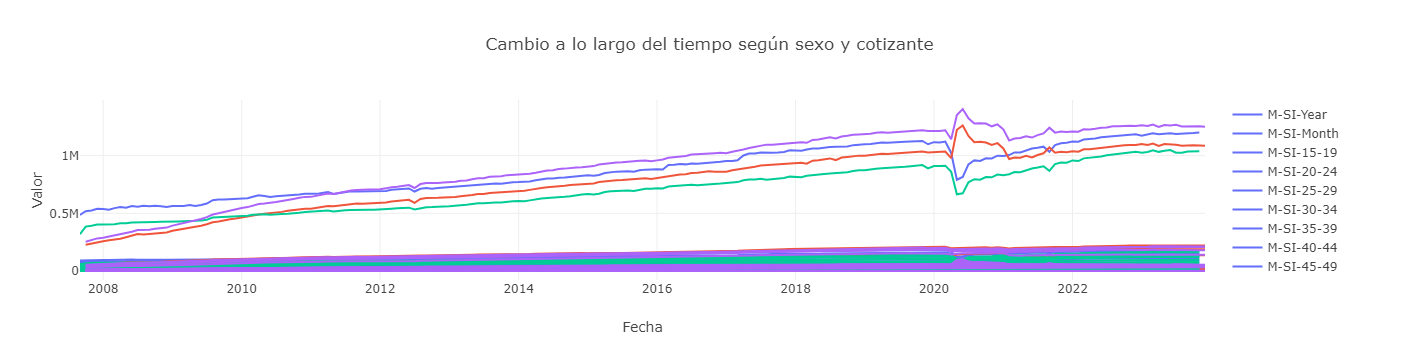

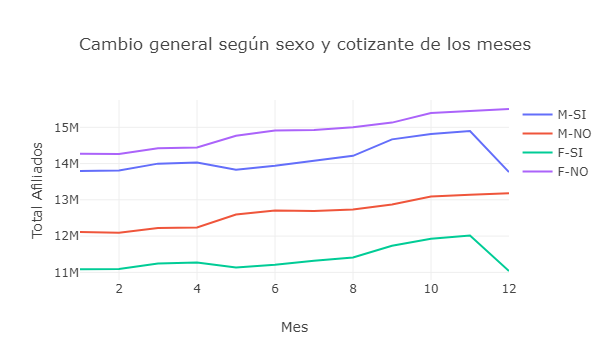

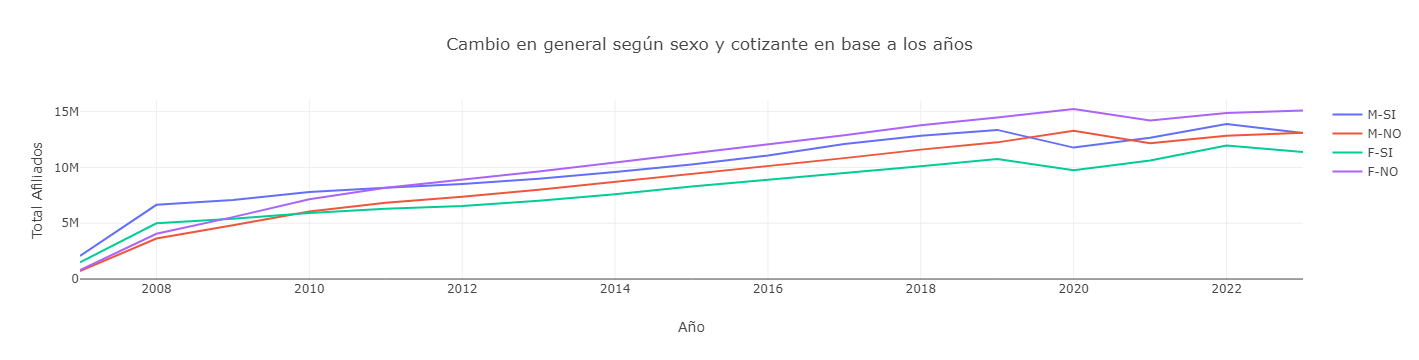

In [15]:
import pandas as pd
import plotly.graph_objects as go

# Cargar los datos desde el archivo CSV
data = pd.read_csv('data/Base_Creada/Afiliados_Edad_Sexo_Cotizacion.csv')

# Convertir las columnas de fecha a tipo datetime
data['Periodo de Cobertura'] = pd.to_datetime(data['Periodo de Cobertura'])

# Gráfico de tiempo para el cambio a lo largo del tiempo en las columnas numéricas según sexo y cotizante
fig1 = go.Figure()
colors = px.colors.qualitative.Plotly

for i, sexo in enumerate(data['Sexo'].unique()):
    for j, cotizante in enumerate(data['Cotizante'].unique()):
        df = data[(data['Sexo'] == sexo) & (data['Cotizante'] == cotizante)]
        for col in df.columns:
            if df[col].dtype in ['int64', 'float64']:
                fig1.add_trace(go.Scatter(x=df['Periodo de Cobertura'], y=df[col], mode='lines', name=f'{sexo}-{cotizante}-{col}', line=dict(color=colors[(i * len(data['Cotizante'].unique())) + j])))

fig1.update_layout(title='Cambio a lo largo del tiempo según sexo y cotizante',
                   xaxis_title='Fecha',
                   yaxis_title='Valor')

# Gráfico que resume el cambio general según sexo y cotizante de los meses
fig2 = go.Figure()

for i, sexo in enumerate(data['Sexo'].unique()):
    for j, cotizante in enumerate(data['Cotizante'].unique()):
        df = data[(data['Sexo'] == sexo) & (data['Cotizante'] == cotizante)]
        total_afiliados = df.groupby('Month')['Total Afiliados'].sum()
        fig2.add_trace(go.Scatter(x=total_afiliados.index, y=total_afiliados.values, mode='lines', name=f'{sexo}-{cotizante}', line=dict(color=colors[(i * len(data['Cotizante'].unique())) + j])))

fig2.update_layout(title='Cambio general según sexo y cotizante de los meses',
                   xaxis_title='Mes',
                   yaxis_title='Total Afiliados')

# Gráfico que refleja el cambio en general según sexo y cotizante en base a los años
fig3 = go.Figure()

for i, sexo in enumerate(data['Sexo'].unique()):
    for j, cotizante in enumerate(data['Cotizante'].unique()):
        df = data[(data['Sexo'] == sexo) & (data['Cotizante'] == cotizante)]
        total_afiliados = df.groupby('Year')['Total Afiliados'].sum()
        fig3.add_trace(go.Scatter(x=total_afiliados.index, y=total_afiliados.values, mode='lines', name=f'{sexo}-{cotizante}', line=dict(color=colors[(i * len(data['Cotizante'].unique())) + j])))

fig3.update_layout(title='Cambio en general según sexo y cotizante en base a los años',
                   xaxis_title='Año',
                   yaxis_title='Total Afiliados')

# Mostrar los gráficos
fig1.show()
fig2.show()
fig3.show()



In [23]:
colors = ['blue', 'green', 'red', 'purple', 'orange', 'yellow']  # Puedes

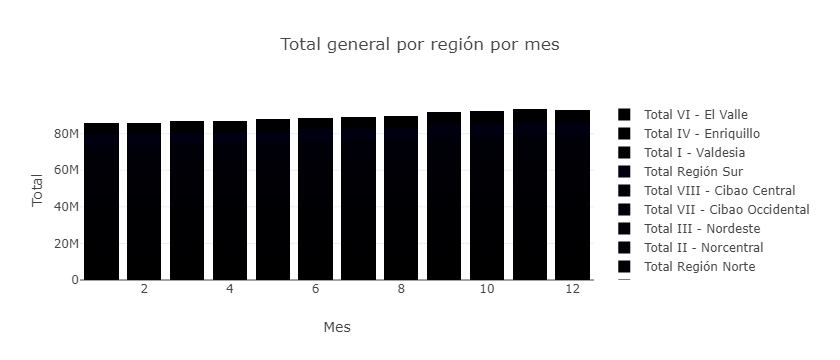

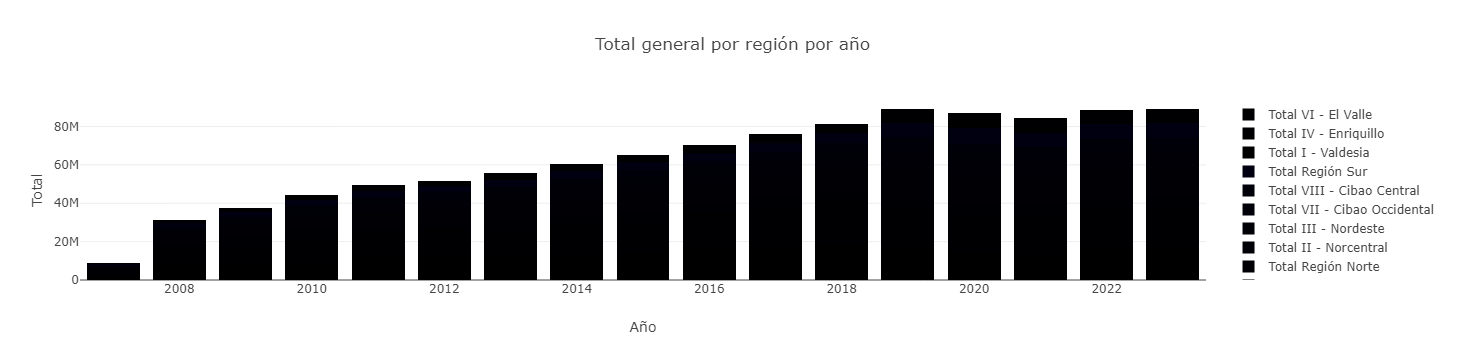

In [22]:
import pandas as pd
import plotly.graph_objects as go

# Gráfico de barras para Total general por región por mes
fig_rc_total_general_mes = go.Figure()
for i, column in enumerate(df_rc_region_salud_total.columns[5:]):
    fig_rc_total_general_mes.add_trace(go.Bar(x=df_rc_region_salud_total['Month'], 
                                              y=df_rc_region_salud_total[column], 
                                              name=column,
                                              marker_color=colors[i % len(colors)]))  # Asignar un color de la paleta a cada barra

fig_rc_total_general_mes.update_layout(title='Total general por región por mes',
                                       xaxis_title='Mes',
                                       yaxis_title='Total',
                                       barmode='stack')

fig_rc_total_general_mes.show()

# Gráfico de barras para Total general por región por año
fig_rc_total_general_anio = go.Figure()
for i, column in enumerate(df_rc_region_salud_total.columns[5:]):
    fig_rc_total_general_anio.add_trace(go.Bar(x=df_rc_region_salud_total['Year'], 
                                              y=df_rc_region_salud_total[column], 
                                              name=column,
                                              marker_color=colors[i % len(colors)]))  # Asignar un color de la paleta a cada barra

fig_rc_total_general_anio.update_layout(title='Total general por región por año',
                                        xaxis_title='Año',
                                        yaxis_title='Total',
                                        barmode='stack')

fig_rc_total_general_anio.show()
